## 콘텐츠 길이와 콘텐츠 등급이 구독자 선호도에 미치는 영향


## 목차

### 1. 배경 및 필요성

- OTT 시장의 경쟁 심화 및 디즈니+의 글로벌 확장 상황
- 데이터 기반의 전략적 의사결정 필요성

### 2. 프로젝트 목적

- OTT 콘텐츠 트렌드 분석을 기반으로 디즈니+의 글로벌 시장 점유율 확대

### 3. 목적에 따른 데이터 선정

- 디즈니+의 강점과 약점 예측 (가설 설정)

### 4. 데이터 분석 (EDA)

### 5. 데이터 분석 결과를 기반으로 가설 검증

- 타 OTT와 비교하여 시장 점유율 확대 전략 제시 (강점 강화, 약점 보완, 차별점 제시)

### 6. 결론

### 7. 프로젝트 회고

### 8. Reference

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 가설 2:콘텐츠 길이에 따른 인기

In [149]:
# CSV 파일 경로 설정
csv_paths = {
    "disney_plus": os.getenv("HOME") + "/aiffel/Datathon/disney_plus_titles.csv",
    "netflix": os.getenv("HOME") + "/aiffel/Datathon/netflix_titles.csv",
    "amazon_prime": os.getenv("HOME") + "/aiffel/Datathon/amazon_prime_titles.csv"
}

# 데이터 로드 및 카피본 생성
datasets = {platform: pd.read_csv(path) for platform, path in csv_paths.items()}
datasets_copies = {platform: data.copy() for platform, data in datasets.items()}

### 'duration' 결측치&이상치 처리 X


Processing disney_plus Dataset

Processing Movie Data for disney_plus
Max Duration (Movie): 183
Median Duration (Movie): 85.0
Min Duration (Movie): 1


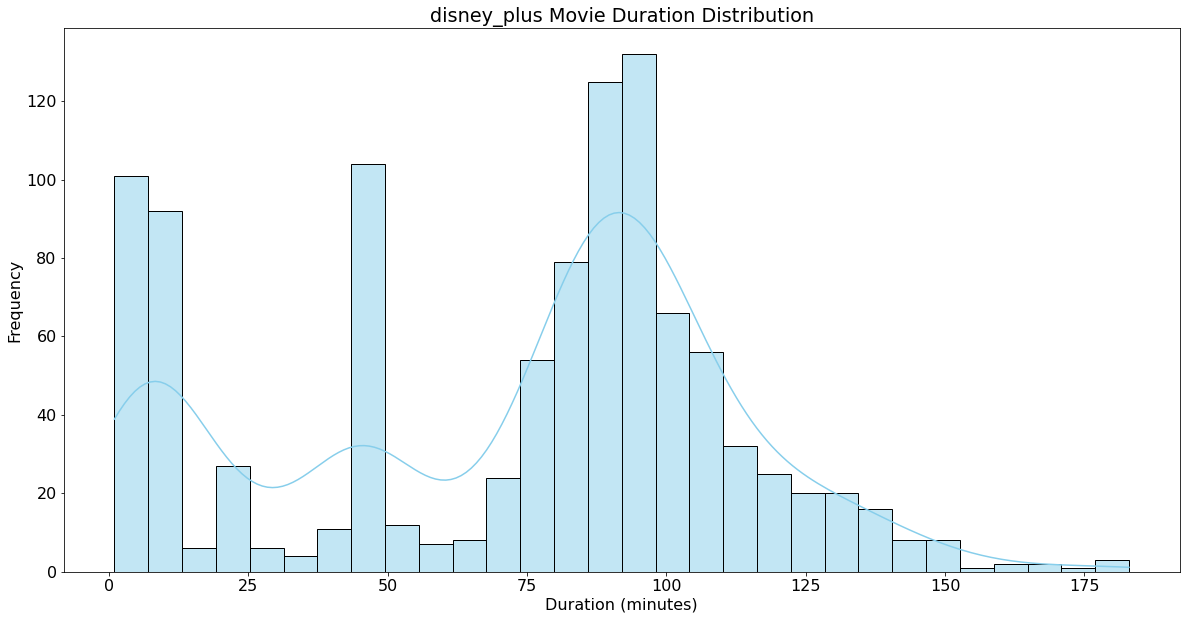


Processing netflix Dataset

Processing Movie Data for netflix
Max Duration (Movie): 312.0
Median Duration (Movie): 98.0
Min Duration (Movie): 3.0


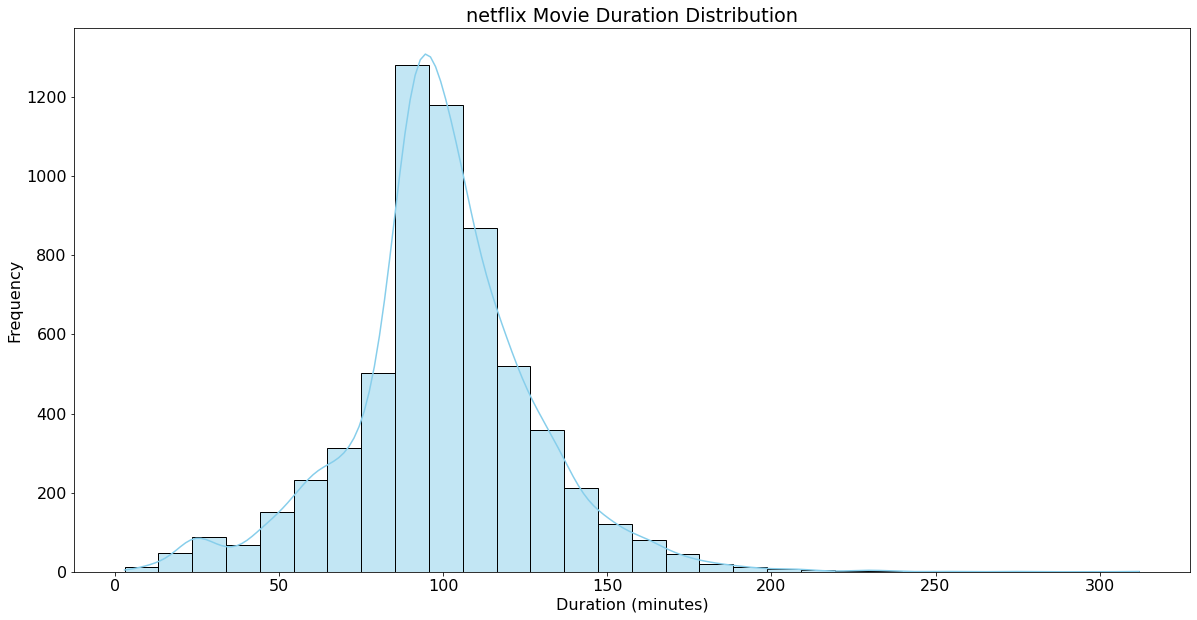


Processing amazon_prime Dataset

Processing Movie Data for amazon_prime
Max Duration (Movie): 601
Median Duration (Movie): 91.0
Min Duration (Movie): 0


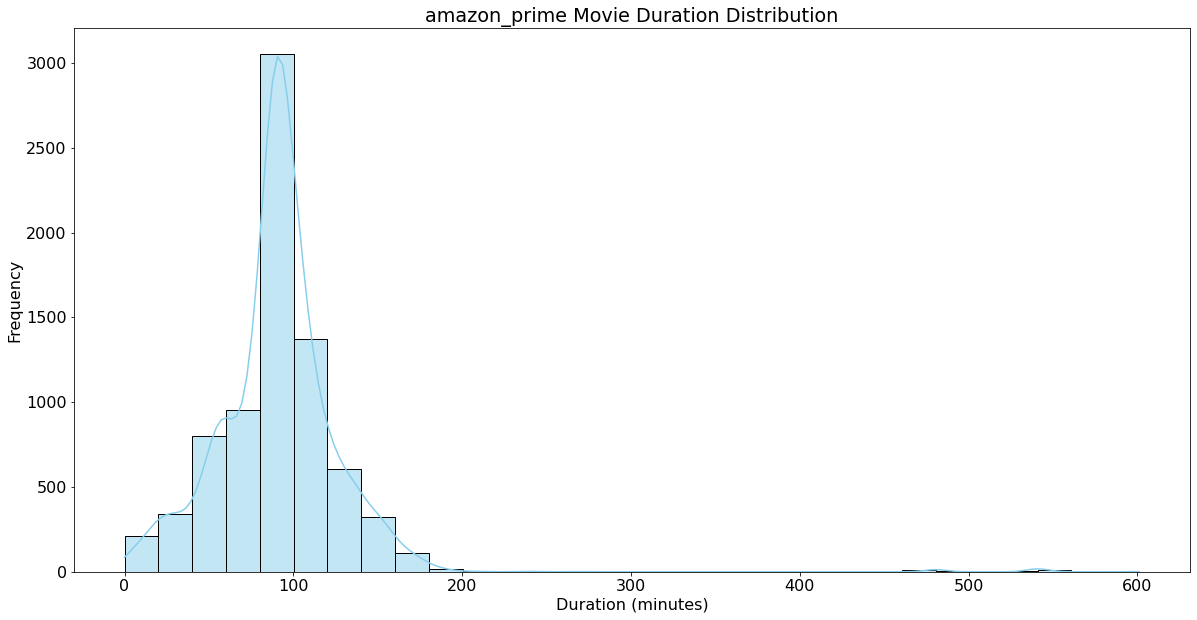

In [150]:
# 'duration' 컬럼에서 숫자만 추출하여 'duration_minutes'로 변환 (Movie)
def normalize_duration_movie(duration_str):
    try:
        # 'min'을 제거하고 숫자만 반환 (Movie)
        return int(duration_str.replace(' min', '').strip())
    except:
        return None  # 'min'이 없거나 오류가 발생할 경우 None 반환

# 컬럼 설정
columns_to_check = ['duration']

for name, df in datasets.items():
    print(f"\nProcessing {name} Dataset")
    
    # Movie와 TV Show 분리
    movies = df[df['type'] == 'Movie'].copy()  # 복사본 생성
    tv_shows = df[df['type'] == 'TV Show']
    
    # Movie의 duration 변환
    movies['duration_minutes'] = movies['duration'].apply(normalize_duration_movie)
    
    # Movie 처리 후
    print(f"\nProcessing Movie Data for {name}")
    max_value_movie = movies['duration_minutes'].max()
    median_value_movie = movies['duration_minutes'].median()
    min_value_movie = movies['duration_minutes'].min()
    print(f"Max Duration (Movie): {max_value_movie}")
    print(f"Median Duration (Movie): {median_value_movie}")
    print(f"Min Duration (Movie): {min_value_movie}")
    
    # 분포도 확인
    plt.figure(figsize=(20, 10))
    sns.histplot(movies['duration_minutes'], kde=True, bins=30, color='skyblue')
    plt.title(f"{name} Movie Duration Distribution")
    plt.xlabel("Duration (minutes)")
    plt.ylabel("Frequency")
    plt.show()


Processing disney_plus Dataset

Processing TV Show Data for disney_plus
Max Duration (TV Show): 32
Median Duration (TV Show): 1.0
Min Duration (TV Show): 1


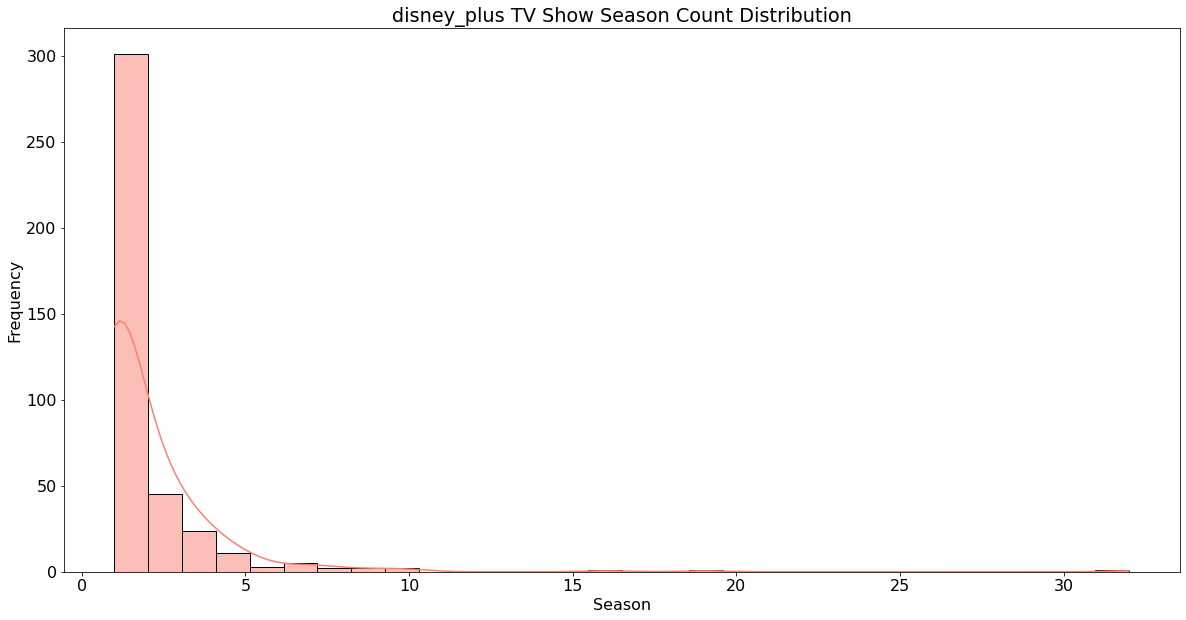


Processing netflix Dataset

Processing TV Show Data for netflix
Max Duration (TV Show): 17
Median Duration (TV Show): 1.0
Min Duration (TV Show): 1


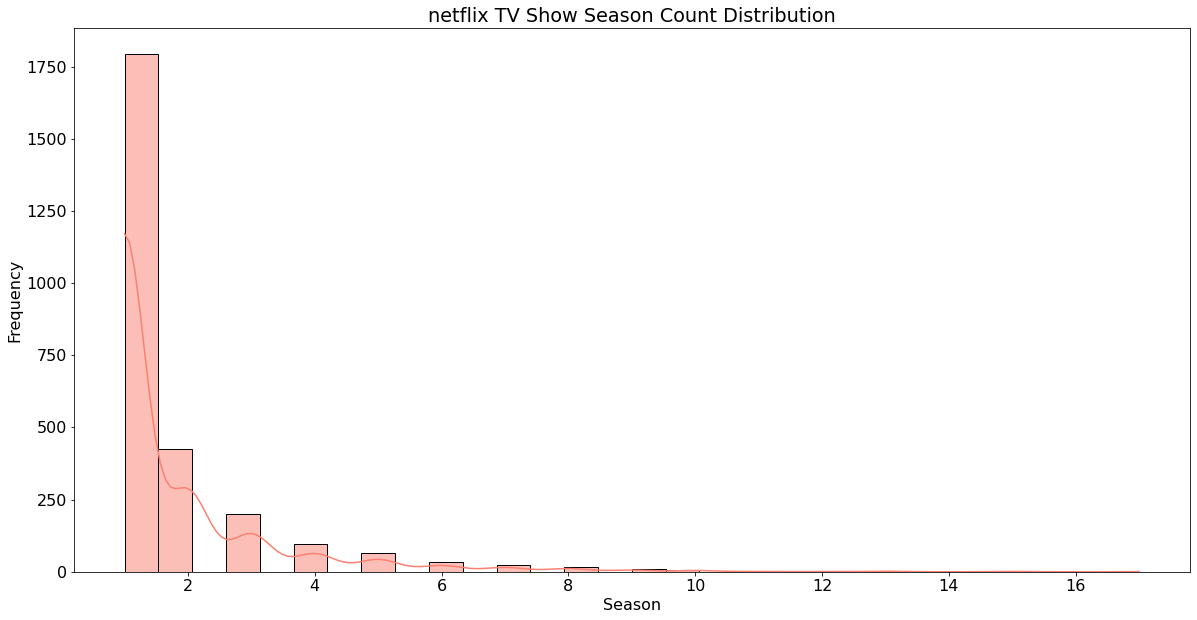


Processing amazon_prime Dataset

Processing TV Show Data for amazon_prime
Max Duration (TV Show): 29
Median Duration (TV Show): 1.0
Min Duration (TV Show): 1


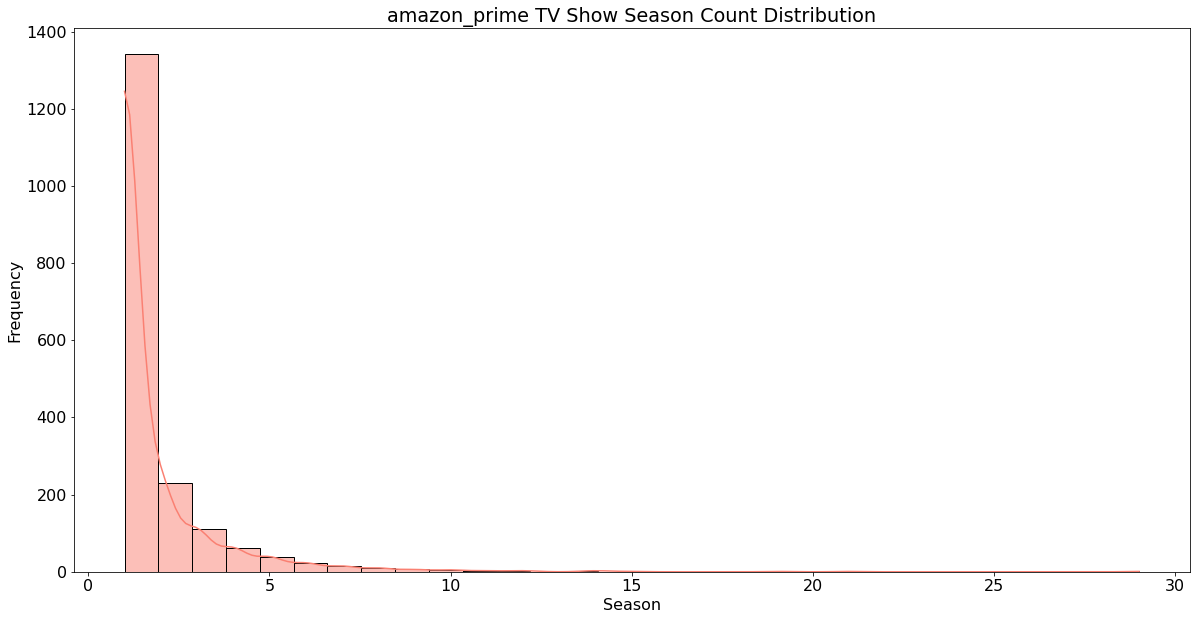

In [151]:
# TV Show의 경우 'Season'을 숫자로 변환
def normalize_duration_tv_show(duration_str):
    try:
        # 'Season'을 포함하는 경우, 시즌 수를 추출
        if 'Season' in duration_str:
            num_seasons = int(duration_str.split()[0])  # 첫 번째 숫자만 추출
            return num_seasons  # 시즌 수 반환
        else:
            return int(duration_str.replace(' min', '').strip())  # Movie와 같은 방식으로 처리
    except:
        return None  # 오류가 발생하면 None 반환

# 컬럼 설정
columns_to_check = ['duration']

for name, df in datasets.items():
    print(f"\nProcessing {name} Dataset")
    
    # Movie와 TV Show 분리
    movies = df[df['type'] == 'Movie'].copy()  # 복사본 생성
    tv_shows = df[df['type'] == 'TV Show'].copy()  # 복사본 생성
        
    # TV Show의 duration 변환
    tv_shows['season_count'] = tv_shows['duration'].apply(normalize_duration_tv_show)
        
    # TV Show 처리 후
    print(f"\nProcessing TV Show Data for {name}")
    max_value_tv_show = tv_shows['season_count'].max()
    median_value_tv_show = tv_shows['season_count'].median()
    min_value_tv_show = tv_shows['season_count'].min()
    print(f"Max Duration (TV Show): {max_value_tv_show}")
    print(f"Median Duration (TV Show): {median_value_tv_show}")
    print(f"Min Duration (TV Show): {min_value_tv_show}")
    
    # 분포도 확인
    plt.figure(figsize=(20, 10))
    sns.histplot(tv_shows['season_count'], kde=True, bins=30, color='salmon')
    plt.title(f"{name} TV Show Season Count Distribution")
    plt.xlabel("Season")
    plt.ylabel("Frequency")
    plt.show()

### 'duration' 결측치&이상치 처리 O _ Movie만

In [152]:
# 결측치 확인 함수 (Movie 전용)
def check_missing_values_movie(df, platform_name):
    missing_count = df['duration'].isnull().sum()
    print(f"Missing values in {platform_name} for 'duration' (Movie): {missing_count}")

# 각 플랫폼에 대해 Movie의 결측치 확인
for name, df in datasets.items():
    print(f"\nProcessing {name} Dataset")
    
    # Movie와 TV Show 분리
    movies = df[df['type'] == 'Movie']
    
    # Movie의 'duration' 결측치 확인
    check_missing_values_movie(movies, name)


Processing disney_plus Dataset
Missing values in disney_plus for 'duration' (Movie): 0

Processing netflix Dataset
Missing values in netflix for 'duration' (Movie): 3

Processing amazon_prime Dataset
Missing values in amazon_prime for 'duration' (Movie): 0


In [153]:
# 결측치 처리 함수
def handle_missing_values_movie(df, platform_name):
    # 결측치가 있는 경우 중앙값으로 대체
    if df['duration'].isnull().sum() > 0:
        # 'duration'에서 ' min'을 제거하고 float로 변환
        df.loc[:, 'duration'] = df['duration'].str.replace(' min', '', regex=False).astype(float)
        median_duration = df['duration'].median()
        df.loc[:, 'duration'].fillna(median_duration, inplace=True)
        df.loc[:, 'duration'] = df['duration'].astype(str) + ' min'  # 다시 ' min'을 추가
        print(f"Missing values in {platform_name} for 'duration' (Movie) have been filled with the median: {median_duration} min")

# Movie의 결측치 처리
for name, df in datasets.items():
    print(f"\nProcessing {name} Dataset")
    
    # Movie와 TV Show 분리
    movies = df[df['type'] == 'Movie'].copy()  # 슬라이스의 복사본을 생성
    
    # Movie의 'duration' 결측치 처리
    handle_missing_values_movie(movies, name)


Processing disney_plus Dataset

Processing netflix Dataset
Missing values in netflix for 'duration' (Movie) have been filled with the median: 98.0 min

Processing amazon_prime Dataset



Processing disney_plus Dataset

Processing Movie Data for disney_plus
disney_plus duration_minutes - Q1: 44.0, Q3: 98.0, IQR: 54.0, Lower bound: -37.0, Upper bound: 179.0


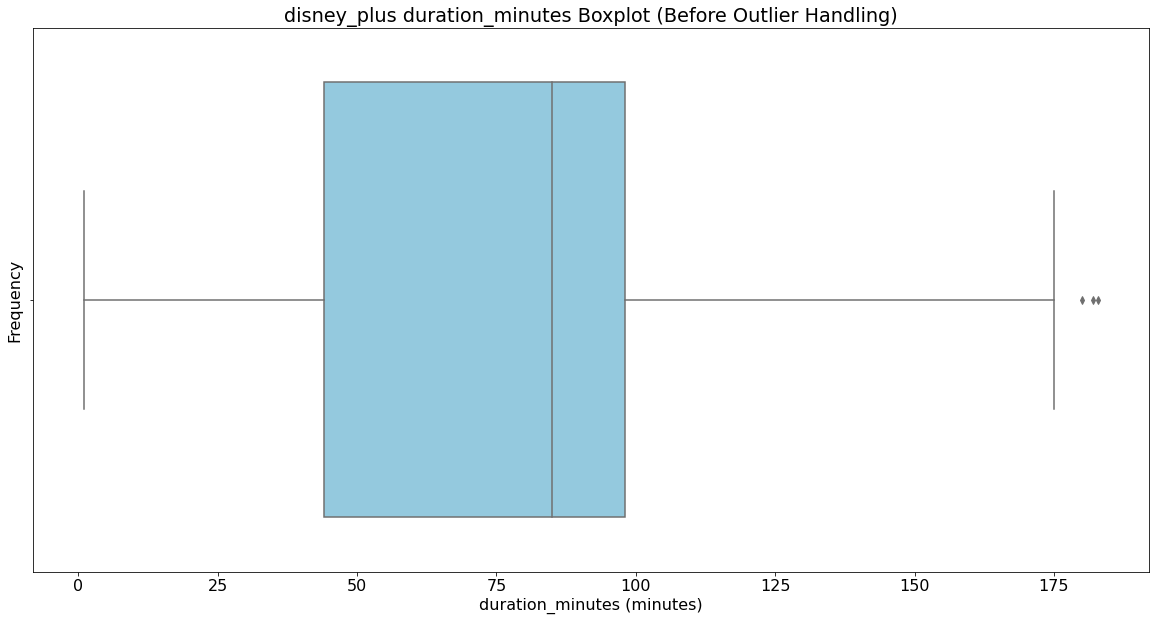

Number of outliers detected: 3

Processing netflix Dataset

Processing Movie Data for netflix
netflix duration_minutes - Q1: 87.0, Q3: 114.0, IQR: 27.0, Lower bound: 46.5, Upper bound: 154.5


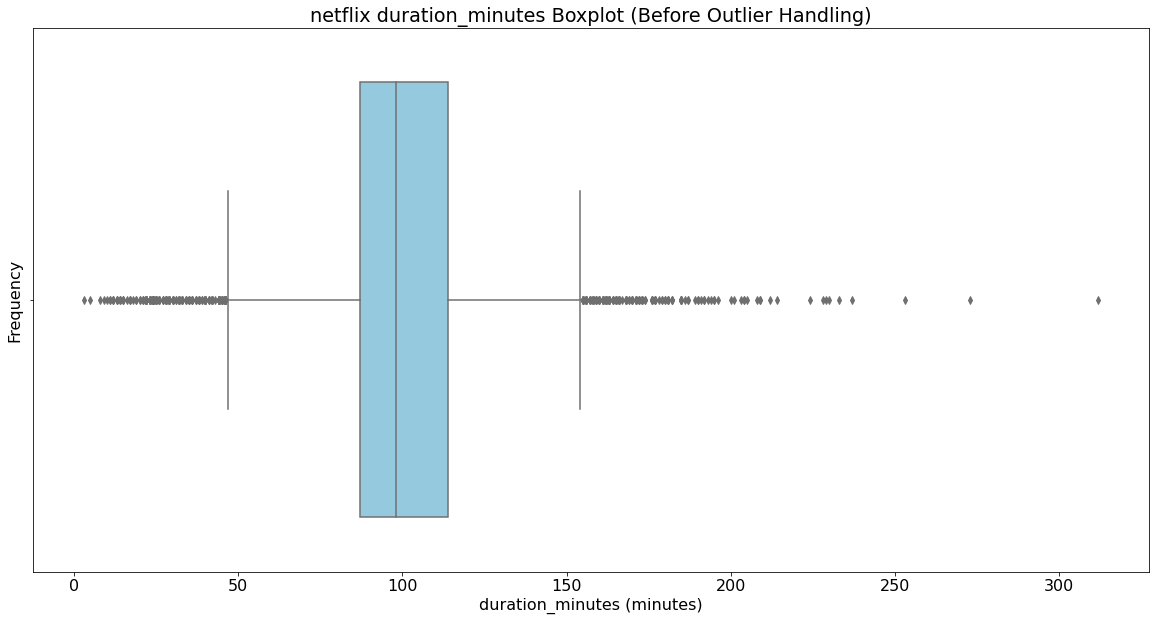

Number of outliers detected: 450

Processing amazon_prime Dataset

Processing Movie Data for amazon_prime
amazon_prime duration_minutes - Q1: 75.0, Q3: 106.0, IQR: 31.0, Lower bound: 28.5, Upper bound: 152.5


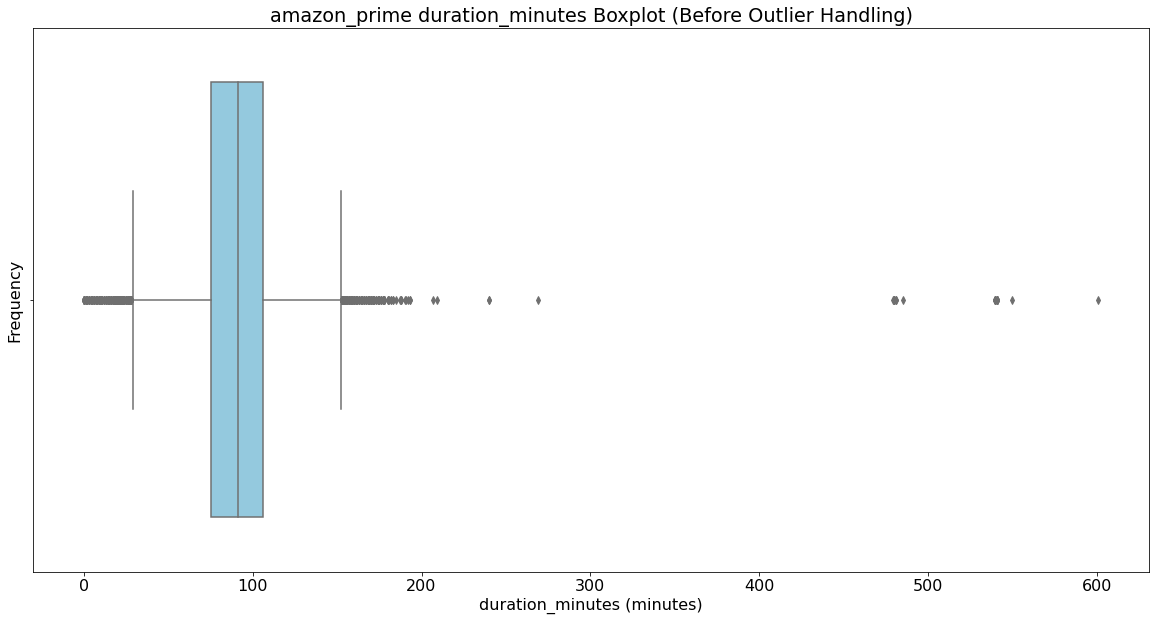

Number of outliers detected: 612


In [154]:
# Movie의 이상치 확인 및 분포도 그리기
def check_outliers_and_plot(df, column, platform_name):
    # IQR을 사용하여 이상치를 판별합니다.
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # 디버깅 출력
    print(f"{platform_name} {column} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower bound: {lower}, Upper bound: {upper}")
    
    # 이상치 시각화
    plt.figure(figsize=(20, 10))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f"{platform_name} {column} Boxplot (Before Outlier Handling)")
    plt.xlabel(f"{column} (minutes)")
    plt.ylabel("Frequency")
    plt.show()
    
    # 이상치 개수 확인
    outliers_count = df[(df[column] < lower) | (df[column] > upper)].shape[0]
    print(f"Number of outliers detected: {outliers_count}")
    
    return df, lower, upper

for name, df in datasets.items():
    print(f"\nProcessing {name} Dataset")
    
    # Movie 데이터만 필터링
    movies = df[df['type'] == 'Movie'].copy()  # 슬라이스의 복사본을 생성
    print(f"\nProcessing Movie Data for {name}")
    
    # 1. Movie의 'duration' 컬럼을 'duration_minutes'로 변환
    movies['duration_minutes'] = movies['duration'].apply(normalize_duration_movie)  # 'duration'을 'duration_minutes'로 변환
    
    # 2. 이상치 및 분포도 확인
    movies, lower_movie, upper_movie = check_outliers_and_plot(movies, 'duration_minutes', name)  # 이상치 확인


Processing disney_plus Dataset
Original count: 1052, Cleaned count: 1049


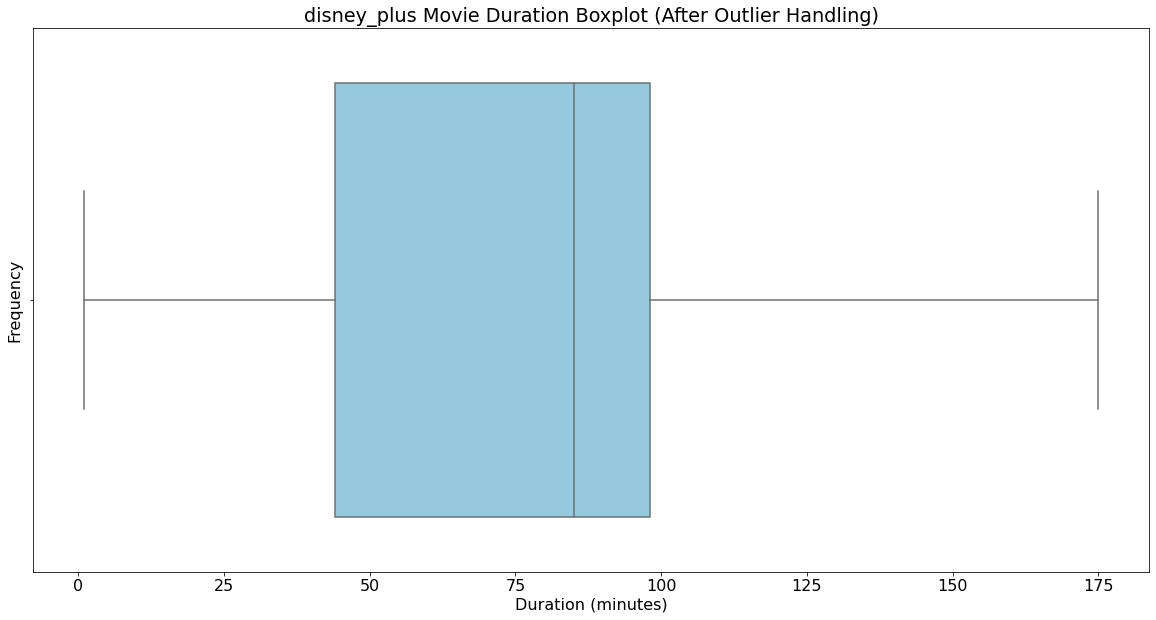


Processing netflix Dataset
Original count: 6131, Cleaned count: 5678


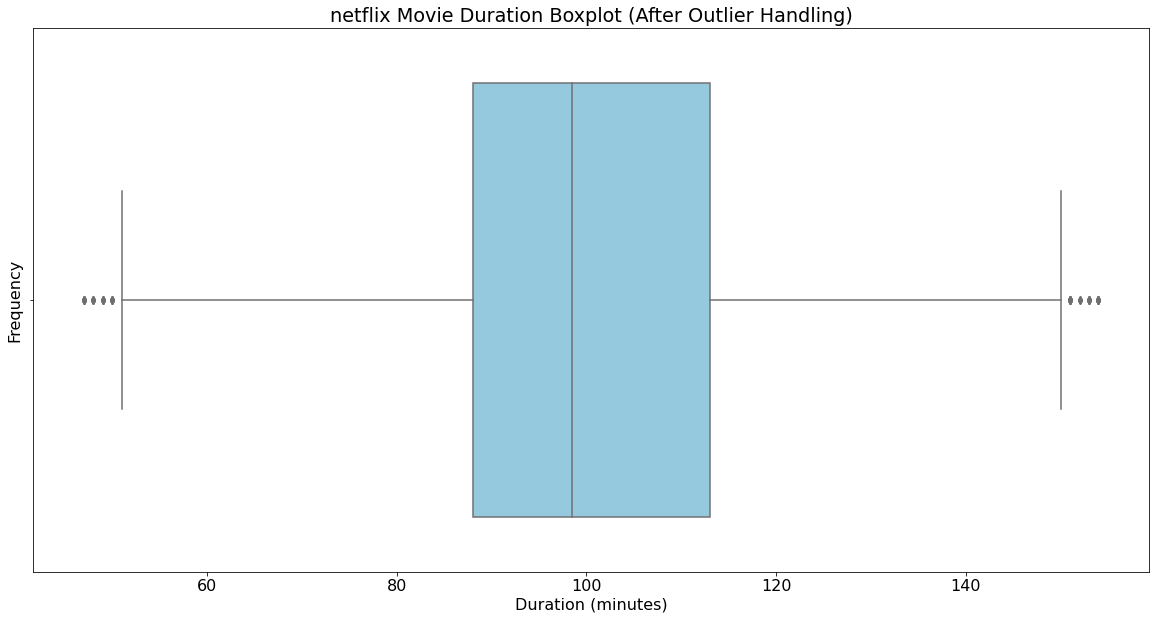


Processing amazon_prime Dataset
Original count: 7814, Cleaned count: 7202


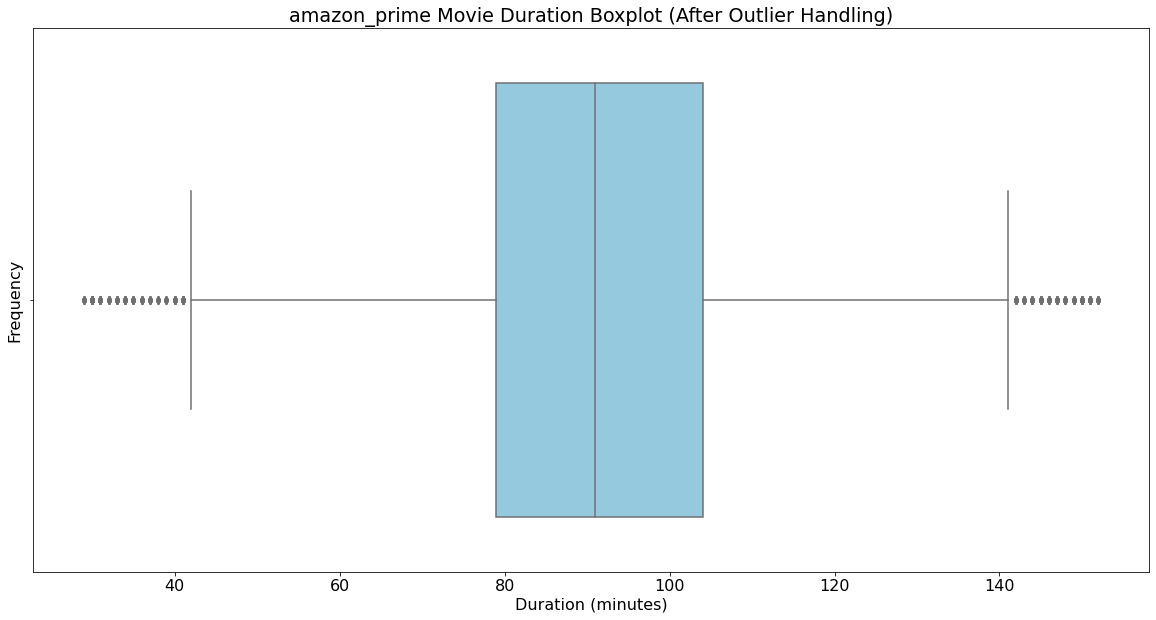

In [155]:
# Movie의 이상치 확인 및 처리
def handle_outliers(df, column):
    # IQR을 사용하여 이상치를 판별합니다.
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # 이상치 제거
    df_cleaned = df[(df[column] >= lower) & (df[column] <= upper)]
    
    # 디버깅 출력
    print(f"Original count: {df.shape[0]}, Cleaned count: {df_cleaned.shape[0]}")
    
    return df_cleaned

# 이상치 처리
for name, df in datasets.items():
    print(f"\nProcessing {name} Dataset")
    
    # Movie 데이터만 필터링
    movies = df[df['type'] == 'Movie'].copy()  # 슬라이스의 복사본을 생성
    
    # 1. Movie의 'duration' 컬럼을 'duration_minutes'로 변환
    movies['duration_minutes'] = movies['duration'].apply(normalize_duration_movie)  # 'duration'을 'duration_minutes'로 변환
    
    # 2. 이상치 처리
    movies_cleaned = handle_outliers(movies, 'duration_minutes')  # 이상치 처리
    
    # 3. 이상치 처리 후 분포도 확인
    plt.figure(figsize=(20, 10))
    sns.boxplot(x=movies_cleaned['duration_minutes'], color='skyblue')
    plt.title(f"{name} Movie Duration Boxplot (After Outlier Handling)")
    plt.xlabel("Duration (minutes)")
    plt.ylabel("Frequency")
    plt.show()

In [156]:
def handle_outliers(df, column):
    # IQR을 사용하여 이상치를 판별합니다.
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # 이상치 판별
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    
    # 이상치 제거
    df_cleaned = df[(df[column] >= lower) & (df[column] <= upper)]
    
    # 디버깅 출력
    print(f"Original count: {df.shape[0]}, Cleaned count: {df_cleaned.shape[0]}, Outliers count: {outliers.shape[0]}")
    
    return df_cleaned, outliers, lower, upper

# 전체 이상치 데이터를 저장할 딕셔너리
all_outliers = {}

for name, df in datasets.items():
    print(f"\nProcessing {name} Dataset")
    
    # Movie 데이터만 필터링
    movies = df[df['type'] == 'Movie'].copy()  # 슬라이스의 복사본을 생성
    
    # 1. Movie의 'duration' 컬럼을 'duration_minutes'로 변환
    movies['duration_minutes'] = movies['duration'].apply(normalize_duration_movie)  # 'duration'을 'duration_minutes'로 변환
    
    # 2. 이상치 처리
    movies_cleaned, outliers, lower, upper = handle_outliers(movies, 'duration_minutes')  # 이상치 처리
    
    # 3. 이상치 데이터의 duration 컬럼만 저장
    all_outliers[name] = outliers['duration']  # duration 컬럼만 저장
    
    # 4. 이상치 요약 출력 (duration 컬럼만)
    print(f"Outliers in {name} Dataset (Count: {len(outliers)}):")
    print(outliers['duration'])  # duration 컬럼만 출력

# 모든 이상치의 duration 컬럼 출력
print("\nSummary of All Outliers Across Datasets:")
for name, durations in all_outliers.items():
    print(f"{name} Dataset - Outliers (Count: {len(durations)}):")
    print(durations)


Processing disney_plus Dataset
Original count: 1052, Cleaned count: 1049, Outliers count: 3
Outliers in disney_plus Dataset (Count: 3):
330     180 min
333     182 min
1039    183 min
Name: duration, dtype: object

Processing netflix Dataset
Original count: 6131, Cleaned count: 5678, Outliers count: 450
Outliers in netflix Dataset (Count: 450):
22      161 min
24      166 min
45       23 min
71       13 min
73      182 min
         ...   
8763     45 min
8764    191 min
8770    171 min
8788    157 min
8802    158 min
Name: duration, Length: 450, dtype: object

Processing amazon_prime Dataset
Original count: 7814, Cleaned count: 7202, Outliers count: 612
Outliers in amazon_prime Dataset (Count: 612):
38        9 min
39       18 min
40       14 min
41       20 min
43       19 min
         ...   
9557      5 min
9558     10 min
9564     10 min
9568    165 min
9638      2 min
Name: duration, Length: 612, dtype: object

Summary of All Outliers Across Datasets:
disney_plus Dataset - Outlier


disney_plus Movie Duration Distribution (Proportions):
Very Short (<60 min): 34.89%
Short (60-89 min): 23.19%
Optimal (90-120 min): 33.17%
Long (>120 min): 8.75%


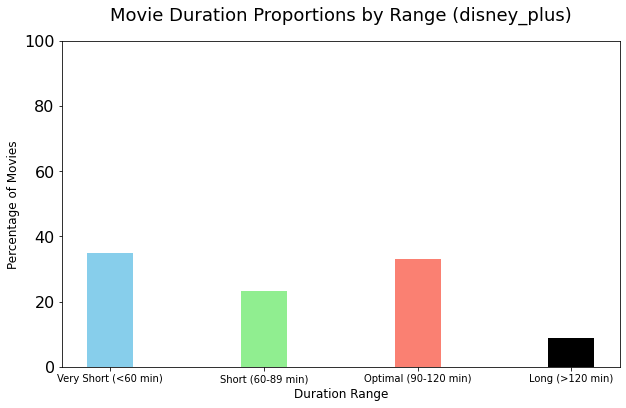


netflix Movie Duration Distribution (Proportions):
Very Short (<60 min): 7.47%
Short (60-89 min): 22.51%
Optimal (90-120 min): 51.35%
Long (>120 min): 18.63%


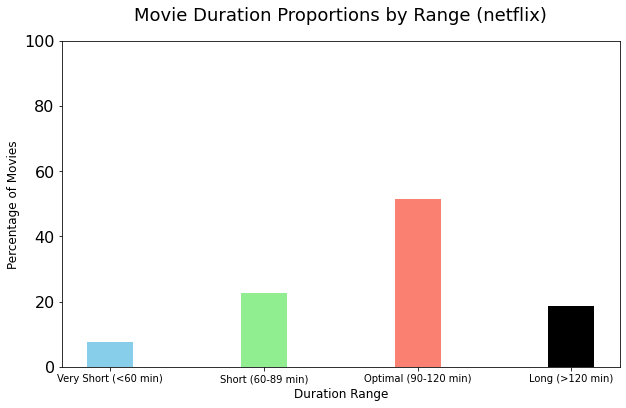


amazon_prime Movie Duration Distribution (Proportions):
Very Short (<60 min): 16.06%
Short (60-89 min): 29.55%
Optimal (90-120 min): 40.48%
Long (>120 min): 13.91%


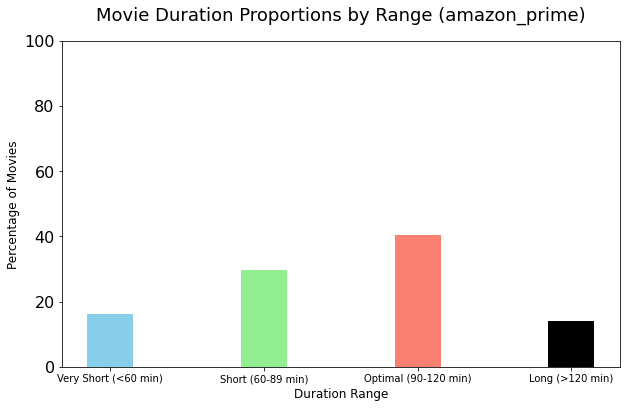

In [157]:
#  Movie Duration 분석
for platform, data in datasets.items():
    # 'duration_minutes' 컬럼 생성 (Movie만 처리)
    data['duration_minutes'] = data['duration'].apply(normalize_duration_movie)  # Movie 처리용 함수 사용
    
    # Movie 분석
    movies = data[data['type'] == 'Movie']
    total_movies = len(movies)  # 전체 영화 수
    
    # duration 범위별 비율 계산
    movie_duration_ranges = {
        "Very Short (<60 min)": len(movies[movies['duration_minutes'] < 60]) / total_movies,
        "Short (60-89 min)": len(movies[(movies['duration_minutes'] >= 60) & (movies['duration_minutes'] < 90)]) / total_movies,
        "Optimal (90-120 min)": len(movies[(movies['duration_minutes'] >= 90) & (movies['duration_minutes'] <= 120)]) / total_movies,
        "Long (>120 min)": len(movies[movies['duration_minutes'] > 120]) / total_movies,
    }
    
    # Movie 비율 출력
    print(f"\n{platform} Movie Duration Distribution (Proportions):")
    for category, proportion in movie_duration_ranges.items():
        print(f"{category}: {proportion * 100:.2f}%")
   
    # Movie 결과 시각화 (비율로)
    plt.figure(figsize=(10, 6))  # 그래프 크기 늘림
    bar_width = 0.3  # 바 너비 설정 (얇게 조정)
    x_pos = range(len(movie_duration_ranges))  # x 위치 조정
    plt.bar(x_pos, [proportion * 100 for proportion in movie_duration_ranges.values()], width=bar_width,
            color=['skyblue', 'lightgreen', 'salmon', 'black'])  # 색상 변경

    # x축 레이블 위치 조정 및 글자 크기 조정
    plt.xticks(x_pos, movie_duration_ranges.keys(), fontsize=10)  # x축 글자 크기 줄임

    # 제목 크기 늘림 및 제목과 그래프 간격 조정
    plt.title(f'Movie Duration Proportions by Range ({platform})', fontsize=18, pad=20)  # 제목 글자 크기 조정, pad로 제목 띄우기
    plt.ylabel('Percentage of Movies', fontsize=12)
    plt.xlabel('Duration Range', fontsize=12)
    plt.ylim(0, 100)  # 비율은 0%에서 100%까지
    plt.show()


disney_plus Movie Duration Distribution (Proportions):
Very Short (<60 min): 34.89%
Short (60-89 min): 23.19%
Optimal (90-120 min): 33.17%
Long (>120 min): 8.75%


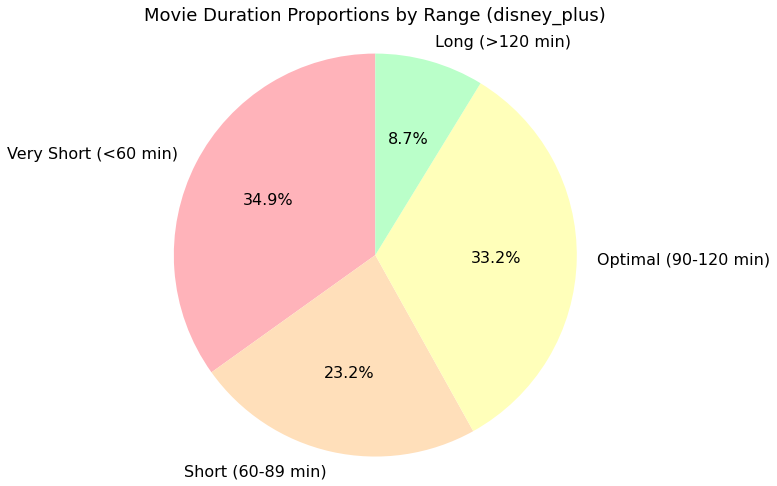


netflix Movie Duration Distribution (Proportions):
Very Short (<60 min): 7.47%
Short (60-89 min): 22.51%
Optimal (90-120 min): 51.35%
Long (>120 min): 18.63%


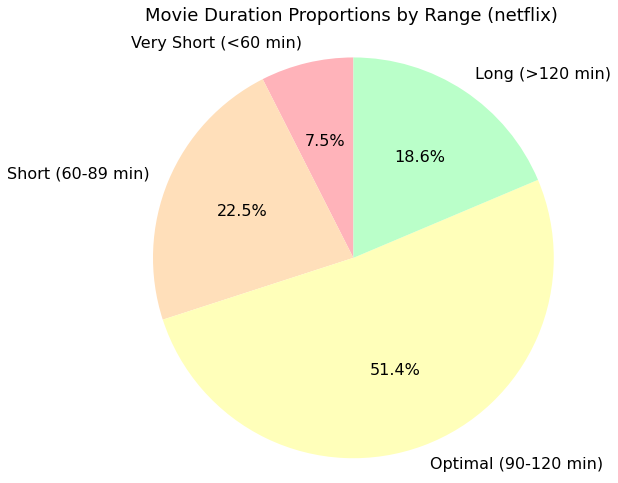


amazon_prime Movie Duration Distribution (Proportions):
Very Short (<60 min): 16.06%
Short (60-89 min): 29.55%
Optimal (90-120 min): 40.48%
Long (>120 min): 13.91%


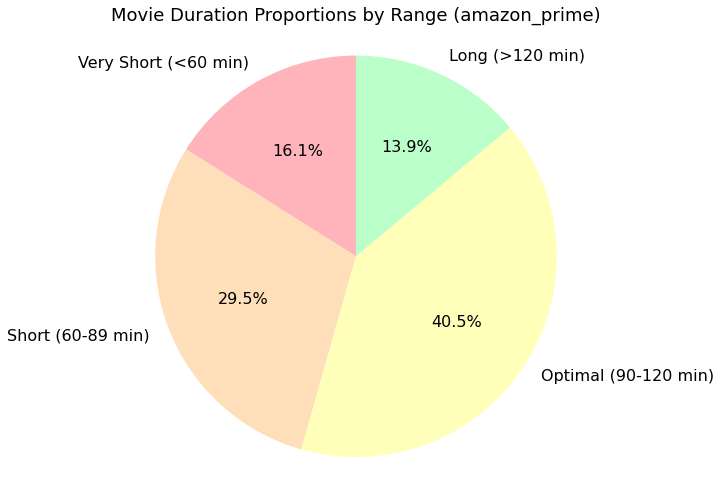

In [158]:
# Movie Duration 분석
for platform, data in datasets.items():
    # 'duration_minutes' 컬럼 생성 (Movie만 처리)
    data['duration_minutes'] = data['duration'].apply(normalize_duration_movie)  # Movie 처리용 함수 사용
    
    # Movie 분석
    movies = data[data['type'] == 'Movie']
    total_movies = len(movies)  # 전체 영화 수
    
    # duration 범위별 비율 계산
    movie_duration_ranges = {
        "Very Short (<60 min)": len(movies[movies['duration_minutes'] < 60]) / total_movies,
        "Short (60-89 min)": len(movies[(movies['duration_minutes'] >= 60) & (movies['duration_minutes'] < 90)]) / total_movies,
        "Optimal (90-120 min)": len(movies[(movies['duration_minutes'] >= 90) & (movies['duration_minutes'] <= 120)]) / total_movies,
        "Long (>120 min)": len(movies[movies['duration_minutes'] > 120]) / total_movies,
    }
    
    # Movie 비율 출력
    print(f"\n{platform} Movie Duration Distribution (Proportions):")
    for category, proportion in movie_duration_ranges.items():
        print(f"{category}: {proportion * 100:.2f}%")
   
    # Movie 결과 시각화 (비율로)
    plt.figure(figsize=(8, 8))  # 그래프 크기 설정
    plt.pie([proportion * 100 for proportion in movie_duration_ranges.values()], 
            labels=movie_duration_ranges.keys(), 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9'])  # 파스텔 색상 변경

    # 제목 크기 늘림 및 제목과 그래프 간격 조정
    plt.title(f'Movie Duration Proportions by Range ({platform})', fontsize=18, pad=20)  # 제목 글자 크기 조정, pad로 제목 띄우기
    plt.axis('equal')  # 원형 그래프의 비율을 균등하게 만듦
    plt.show()


disney_plus TV Show Duration Distribution (Proportions):
short (<2 seasons): 55.03%
medium (2-3 seasons): 31.91%
long (>3 seasons): 13.07%


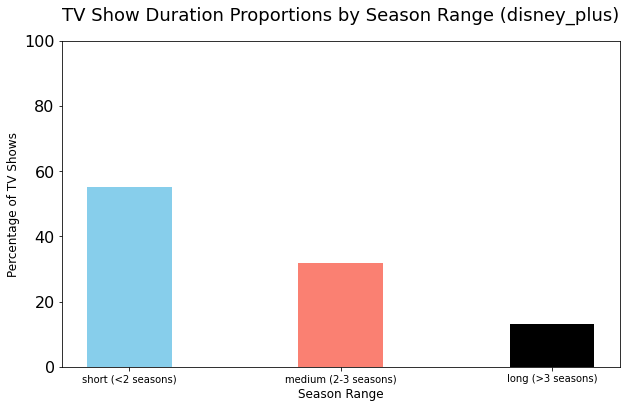


netflix TV Show Duration Distribution (Proportions):
short (<2 seasons): 67.00%
medium (2-3 seasons): 23.32%
long (>3 seasons): 9.68%


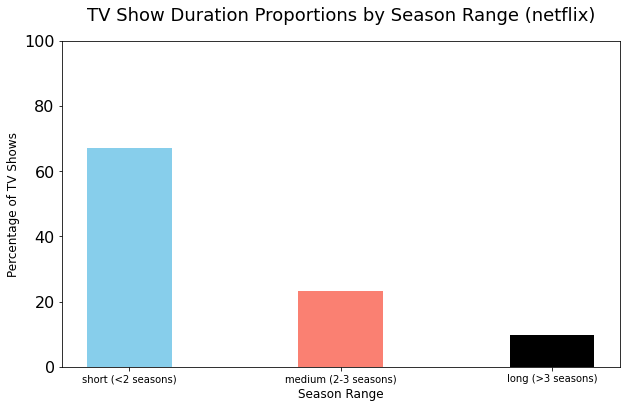


amazon_prime TV Show Duration Distribution (Proportions):
short (<2 seasons): 72.38%
medium (2-3 seasons): 18.28%
long (>3 seasons): 9.33%


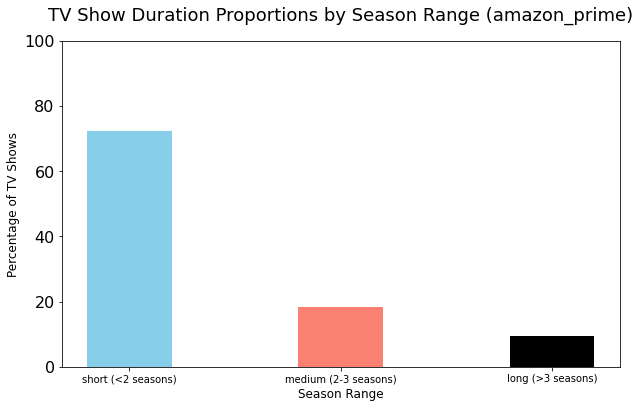

In [159]:
# TV Show Duration 분석
for platform, data in datasets.items():
    # 'duration_minutes' 컬럼 생성 (TV Show 처리)
    data['duration_minutes'] = data['duration'].apply(normalize_duration_tv_show)  # TV Show 처리용 함수 사용
    
    # TV Show 분석
    tv_shows = data[data['type'].str.lower() == 'tv show']
    total_tv_shows = len(tv_shows)  # 전체 TV Show 수
    
    # 비율 계산
    if total_tv_shows > 0:
        tv_duration_ranges = {
            "short (<2 seasons)": len(tv_shows[tv_shows['duration_minutes'] == 1]) / total_tv_shows,
            "medium (2-3 seasons)": len(tv_shows[(tv_shows['duration_minutes'] >= 2) & (tv_shows['duration_minutes'] <= 3)]) / total_tv_shows,
            "long (>3 seasons)": len(tv_shows[tv_shows['duration_minutes'] > 3]) / total_tv_shows,
        }
    else:
        tv_duration_ranges = {"short (<2 seasons)": 0, "medium (2-3 seasons)": 0, "long (>3 seasons)": 0}
    
    # TV Show 비율 출력
    print(f"\n{platform} TV Show Duration Distribution (Proportions):")
    for category, proportion in tv_duration_ranges.items():
        print(f"{category}: {proportion * 100:.2f}%")
    
    # TV Show 결과 시각화 (비율로)
    plt.figure(figsize=(10, 6))  # 그래프 크기 늘림
    bar_width = 0.4  # 바 너비 설정
    x_pos = range(len(tv_duration_ranges))  # x 위치 조정
    plt.bar(x_pos, [proportion * 100 for proportion in tv_duration_ranges.values()], width=bar_width,
            color=['skyblue', 'salmon', 'black'])  # 색상 변경

    # x축 레이블 위치 조정 및 글자 크기 조정
    plt.xticks(x_pos, tv_duration_ranges.keys(), fontsize=10)  # x축 글자 크기 줄임

    # 제목 크기 늘림 및 제목과 그래프 간격 조정
    plt.title(f'TV Show Duration Proportions by Season Range ({platform})', fontsize=18, pad=20)  # 제목 글자 크기 조정, pad로 제목 띄우기
    plt.ylabel('Percentage of TV Shows', fontsize=12)
    plt.xlabel('Season Range', fontsize=12)
    plt.ylim(0, 100)  # 비율은 0%에서 100%까지
    plt.show()

## 가설 3: 콘텐츠 등급별 구독자 선호도

--- disney_plus 콘텐츠 등급 분석 ---
G           253
PG          235
TV-G        233
TV-PG       181
PG-13        66
TV-14        37
TV-Y7        36
TV-Y7-FV      7
TV-Y          3
UNRATED       1
Name: rating, dtype: int64




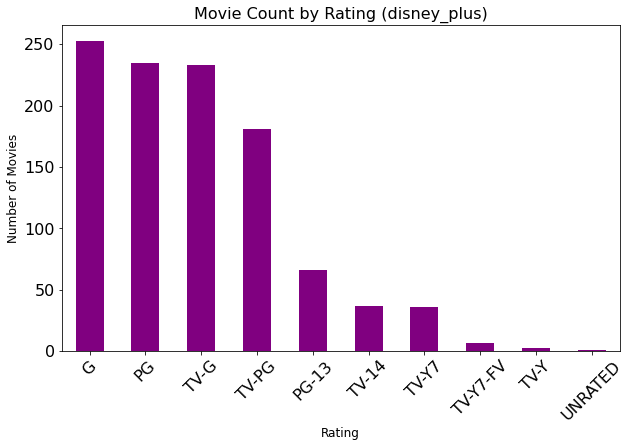

--- netflix 콘텐츠 등급 분석 ---
TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
UNRATED        2
74 MIN         1
84 MIN         1
66 MIN         1
Name: rating, dtype: int64




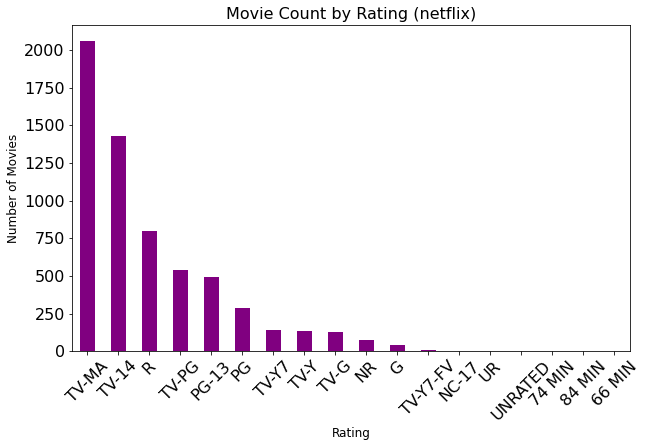

--- amazon_prime 콘텐츠 등급 분석 ---
13+         1849
16+         1272
18+         1097
R           1010
ALL          988
PG-13        393
UNRATED      364
7+           288
PG           253
NR           194
G             93
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: rating, dtype: int64




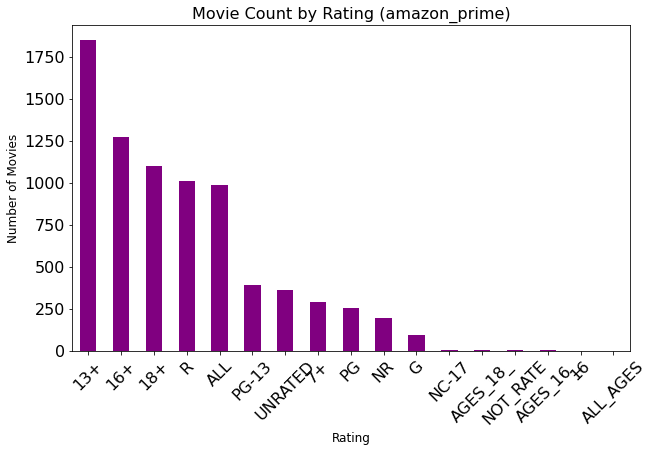

In [160]:
# 콘텐츠 등급 분석 및 결과 출력
for platform, data in datasets_copies.items():
    data['rating'] = data['rating'].fillna('Unrated').str.upper()  # 결측값 처리 및 대문자 변환
    movies = data[data['type'] == 'Movie']  # 영화 데이터만 필터링
    rating_counts = movies['rating'].value_counts()  # 등급별 영화 수 세기
    
    # 결과 출력
    print(f"--- {platform} 콘텐츠 등급 분석 ---")
    print(rating_counts)
    print("\n")  # 각 플랫폼 결과 간격을 두기 위해 줄 바꿈
    
    # 결과 시각화
    plt.figure(figsize=(10, 6))
    rating_counts.plot(kind='bar', color='purple')
    plt.title(f'Movie Count by Rating ({platform})', fontsize=16)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.xlabel('Rating', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

### G, PG, PG-13, R, NC-17 재분류

In [161]:
# Disney Plus 콘텐츠 등급 데이터
disney_plus_data = {
    'Rating': ['G', 'PG', 'TV-G', 'TV-PG', 'PG-13', 'TV-14', 'TV-Y7', 'TV-Y7-FV', 'TV-Y', 'UNRATED'],
    'Count': [253, 235, 233, 181, 66, 37, 36, 7, 3, 1]
}

# Netflix 콘텐츠 등급 데이터
netflix_data = {
    'Rating': ['TV-MA', 'TV-14', 'R', 'TV-PG', 'PG-13', 'PG', 'TV-Y7', 'TV-Y', 'TV-G', 'NR', 
               'G', 'TV-Y7-FV', 'NC-17', 'UR', 'UNRATED', '74 MIN', '84 MIN', '66 MIN'],
    'Count': [2062, 1427, 797, 540, 490, 287, 139, 131, 126, 75, 
              41, 5, 3, 3, 2, 1, 1, 1]
}

# Amazon Prime 콘텐츠 등급 데이터
amazon_prime_data = {
    'Rating': ['13+', '16+', '18+', 'R', 'ALL', 'PG-13', 'UNRATED', '7+', 'PG', 'NR', 
               'G', 'NC-17', 'AGES_18_', 'NOT_RATE', 'AGES_16_', '16', 'ALL_AGES'],
    'Count': [1849, 1272, 1097, 1010, 988, 393, 364, 288, 253, 194, 
              93, 3, 3, 3, 2, 1, 1]
}

# 데이터프레임 생성
disney_plus_df = pd.DataFrame(disney_plus_data)
netflix_df = pd.DataFrame(netflix_data)
amazon_prime_df = pd.DataFrame(amazon_prime_data)

# 재분류 함수
def classify_rating(rating):
    if rating in ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'G', 'Approved', 'Passed', 'ALL', 'ALL_AGES']:
        return 'G'
    elif rating in ['TV-PG', 'PG', '7+']:
        return 'PG'
    elif rating in ['TV-14', 'PG-13', '13+']:
        return 'PG-13'
    elif rating in ['TV-MA', 'R', '16+', 'AGES_16_', '16']:
        return 'R'
    elif rating in ['NC-17', 'X', '18+', 'AGES_18_']:
        return 'NC-17'
    else:
        return 'Other'

# 재분류 적용
disney_plus_df['Classified'] = disney_plus_df['Rating'].apply(classify_rating)
netflix_df['Classified'] = netflix_df['Rating'].apply(classify_rating)
amazon_prime_df['Classified'] = amazon_prime_df['Rating'].apply(classify_rating)

# 각 플랫폼의 콘텐츠 등급 수 계산
disney_plus_classified = disney_plus_df.groupby('Classified')['Count'].sum()
netflix_classified = netflix_df.groupby('Classified')['Count'].sum()
amazon_prime_classified = amazon_prime_df.groupby('Classified')['Count'].sum()

# G, PG, PG-13, R, NC-17, Other 순서로 정렬
ordered_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'Other']
disney_plus_classified = disney_plus_classified.reindex(ordered_ratings, fill_value=0)
netflix_classified = netflix_classified.reindex(ordered_ratings, fill_value=0)
amazon_prime_classified = amazon_prime_classified.reindex(ordered_ratings, fill_value=0)

# 결과 출력
print("--- Disney Plus 콘텐츠 등급 분석 ---")
print(disney_plus_classified)
print("\n--- Netflix 콘텐츠 등급 분석 ---")
print(netflix_classified)
print("\n--- Amazon Prime 콘텐츠 등급 분석 ---")
print(amazon_prime_classified)

--- Disney Plus 콘텐츠 등급 분석 ---
Classified
G        532
PG       416
PG-13    103
R          0
NC-17      0
Other      1
Name: Count, dtype: int64

--- Netflix 콘텐츠 등급 분석 ---
Classified
G         442
PG        827
PG-13    1917
R        2859
NC-17       3
Other      83
Name: Count, dtype: int64

--- Amazon Prime 콘텐츠 등급 분석 ---
Classified
G        1082
PG        541
PG-13    2242
R        2285
NC-17    1103
Other     561
Name: Count, dtype: int64


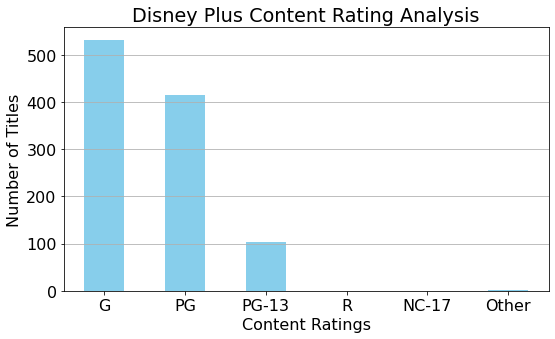

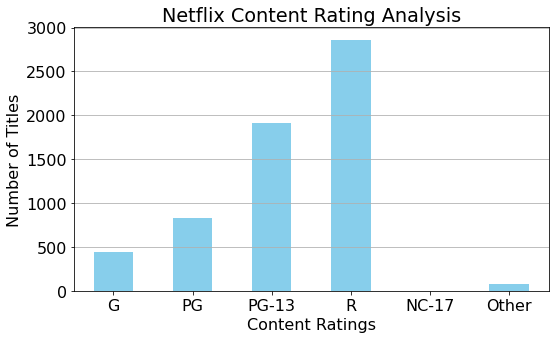

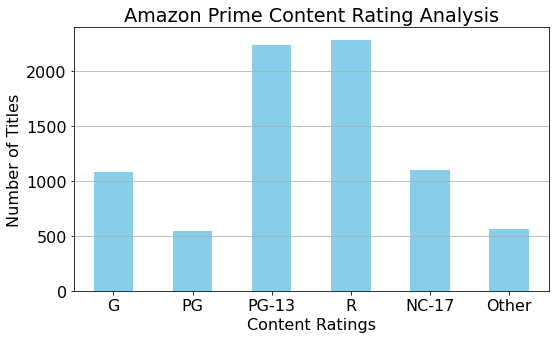

In [162]:
# 데이터프레임 생성
summary_df = pd.DataFrame({
    'Disney Plus': disney_plus_classified,
    'Netflix': netflix_classified,
    'Amazon Prime': amazon_prime_classified
})

# G, PG, PG-13, R, NC-17, Other 순서로 정렬
ordered_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'Other']
summary_df = summary_df.reindex(ordered_ratings)

# 각 플랫폼에 대해 개별 그래프 생성
platforms = summary_df.columns

for platform in platforms:
    plt.figure(figsize=(8, 5))
    summary_df[platform].plot(kind='bar', color='skyblue')
    
    # 그래프 제목 및 레이블 설정
    plt.title(f'{platform} Content Rating Analysis')
    plt.xlabel('Content Ratings')
    plt.ylabel('Number of Titles')
    plt.xticks(rotation=0)  # x축 레이블 회전
    plt.grid(axis='y')
    
    # 그래프 출력
    plt.tight_layout()
    plt.show()

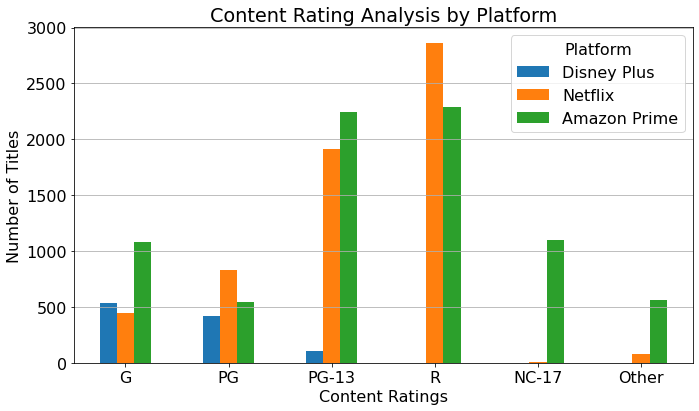

In [163]:
# 병합
summary_df.plot(kind='bar', figsize=(10, 6))

# 그래프 제목 및 레이블 설정
plt.title('Content Rating Analysis by Platform')
plt.xlabel('Content Ratings')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)  # x축 레이블 회전
plt.legend(title='Platform')
plt.grid(axis='y')

# 그래프 출력
plt.tight_layout()
plt.show()

비율 데이터프레임:
            Disney Plus    Netflix  Amazon Prime
Classified                                      
               0.095057   1.353776      7.179422
13 =< age      0.000000  46.680802     43.358075
age < 13      99.904943  51.965422     49.462503


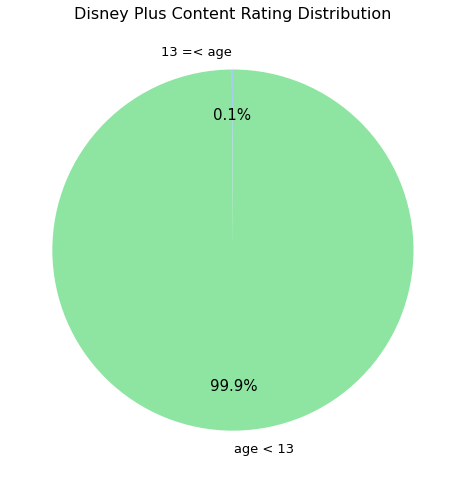

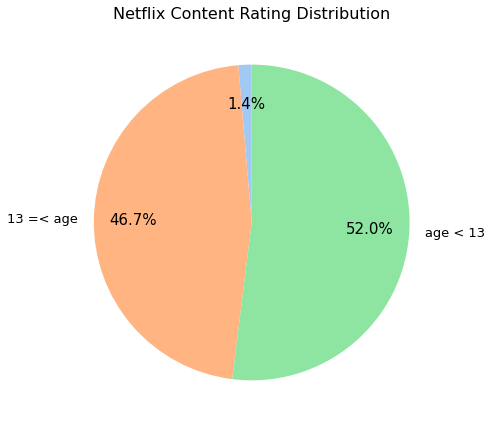

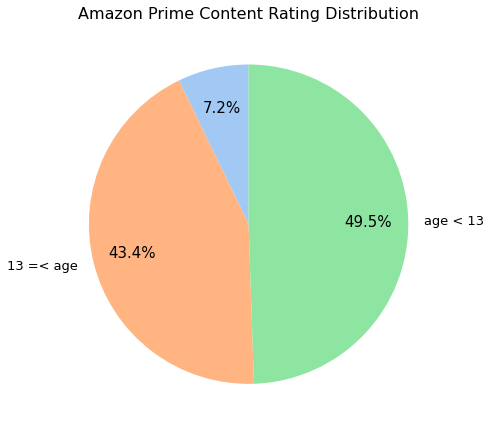

In [164]:
# G, R, Other로 재분류하여 집계
def classify_for_graph(rating):
    if rating in ['G', 'PG', 'PG-13', 'TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV']:
        return 'age < 13'
    elif rating in ['R', 'NC-17', 'TV-MA', '16+', 'AGES_16_', '16']:
        return '13 =< age'
    else:
        return ''

# 그래프를 위한 데이터프레임 생성
summary_df = pd.DataFrame({
    'Disney Plus': disney_plus_classified,
    'Netflix': netflix_classified,
    'Amazon Prime': amazon_prime_classified
})

# G, R, Other로 집계
summary_graph = summary_df.groupby(lambda x: classify_for_graph(x), axis=0).sum()

# 비율 계산
summary_graph_ratio = summary_graph.div(summary_graph.sum(axis=0), axis=1) * 100  # 비율 계산 (%)

# 비율 데이터프레임 출력
print("비율 데이터프레임:")
print(summary_graph_ratio)

# 파스텔 색상 팔레트 설정
pastel_colors = sns.color_palette("pastel", len(summary_graph.index))  # 등급 개수에 맞는 파스텔 색상

# 그래프 생성
platforms = summary_graph_ratio.columns

for platform in platforms:
    plt.figure(figsize=(7, 7))

    # 모든 비율을 포함
    values = summary_graph_ratio[platform].values
    labels = summary_graph_ratio.index

    # 퍼센테이지 표시 함수
    def autopct_func(pct):
        if pct > 0:  # 0보다 큰 경우에만 표시
            return f'{pct:.1f}%'
        return ''

    # 원형 그래프
    wedges, texts, autotexts = plt.pie(
        values,
        labels=labels,
        autopct=autopct_func,
        startangle=90,
        colors=pastel_colors,
        pctdistance=0.75,  # 퍼센테이지와 원의 중심 거리 (조정 가능)
        labeldistance=1.1,  # 레이블과 원의 중심 거리 (조정 가능)
    )

    # 레이블과 퍼센테이지의 크기 조정
    for text in texts:
        text.set_size(13)  # 레이블 크기
    for autotext in autotexts:
        autotext.set_size(15)  # 퍼센테이지 크기

    plt.title(f'{platform} Content Rating Distribution', fontsize=16)
    plt.tight_layout()
    plt.show()

ANOVA 결과 (All Platforms): F-statistic = 624.1636823848843, p-value = 0.0
Kruskal-Wallis 검정 결과 (All Platforms): H-statistic = 1779.933249655857, p-value = 0.0


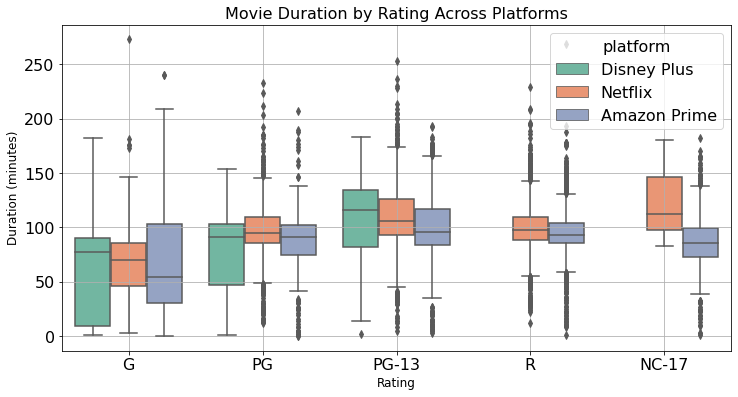

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Rating을 분류하는 함수
def classify_rating(rating):
    if rating in ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'G', 'Approved', 'Passed', 'ALL', 'ALL_AGES']:
        return 'G'
    elif rating in ['TV-PG', 'PG', '7+']:
        return 'PG'
    elif rating in ['TV-14', 'PG-13', '13+']:
        return 'PG-13'
    elif rating in ['TV-MA', 'R', '16+', 'AGES_16_', '16']:
        return 'R'
    elif rating in ['NC-17', 'X', '18+', 'AGES_18_']:
        return 'NC-17'
    else:
        return 'Other'

# 연령등급 순서 정의 (Other 제외)
ordered_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17']

# 데이터프레임에서 Movie만 필터링하고, 필요한 컬럼을 추출하는 함수
def prepare_movie_data(data):
    data['duration_minutes'] = data['duration'].apply(normalize_duration_movie)  # 영화 길이 정리
    data['rating'] = data['rating'].apply(classify_rating)  # Rating 분류
    data = data[data['duration_minutes'] <= 300]  # 영화 길이가 300분 이하로 제한
    return data[data['rating'] != 'Other'][['rating', 'duration_minutes']]  # 'Other' 제외

# 각 플랫폼의 데이터 준비
disney_plus_movies = prepare_movie_data(datasets['disney_plus'])
netflix_movies = prepare_movie_data(datasets['netflix'])
amazon_prime_movies = prepare_movie_data(datasets['amazon_prime'])

# 각 플랫폼에 'platform' 컬럼 추가
disney_plus_movies['platform'] = 'Disney Plus'
netflix_movies['platform'] = 'Netflix'
amazon_prime_movies['platform'] = 'Amazon Prime'

# 모든 플랫폼 데이터를 합침
all_platforms_movies = pd.concat([disney_plus_movies, netflix_movies, amazon_prime_movies])

# ANOVA 및 Kruskal-Wallis 검정 함수
def run_anova_and_kruskal(data, platform_name):
    valid_categories = [category for category in ordered_ratings if data[data['rating'] == category].shape[0] > 0]
    
    if len(valid_categories) > 1:
        # ANOVA
        anova_result = stats.f_oneway(
            *[data[data['rating'] == category]['duration_minutes'].dropna() for category in valid_categories]
        )
        print(f"ANOVA 결과 ({platform_name}): F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
        
        # Kruskal-Wallis
        kruskal_result = stats.kruskal(
            *[data[data['rating'] == category]['duration_minutes'].dropna() for category in valid_categories]
        )
        print(f"Kruskal-Wallis 검정 결과 ({platform_name}): H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")
    else:
        print(f"{platform_name}에서 유효한 그룹이 부족하여 검정을 수행할 수 없습니다.")

# ANOVA 및 Kruskal-Wallis 검정 실행
run_anova_and_kruskal(all_platforms_movies, 'All Platforms')

# 개별 플랫폼에 대해 하나의 상자그림을 그리기 위한 함수
def plot_boxplot_for_all_platforms(data):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='rating', y='duration_minutes', hue='platform', data=data, palette='Set2')

    plt.title('Movie Duration by Rating Across Platforms', fontsize=16)
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Duration (minutes)', fontsize=12)
    plt.grid(True)

    # 그래프 출력
    plt.show()

# 모든 플랫폼에 대해 하나의 상자그림 출력
plot_boxplot_for_all_platforms(all_platforms_movies)

## 가설 6: 국가별 콘텐츠 선호도 차이

In [166]:
# 'country' 컬럼의 항목별 값 출력
csv_path = os.getenv("HOME") +"/aiffel/Datathon/disney_plus_titles.csv"
original_data1 = pd.read_csv(csv_path)
disney = original_data1.copy()
disney['country'].value_counts()

United States                                                  1005
United States, Canada                                            30
United Kingdom                                                   23
United States, United Kingdom                                    22
Canada, United States                                            17
                                                               ... 
Ireland, United States                                            1
Ireland, United Kingdom, United States, South Korea, Canada       1
United States, South Korea, France                                1
United States, Australia, France, Canada                          1
United States, Ireland                                            1
Name: country, Length: 89, dtype: int64

In [167]:
# 'country' 컬럼의 항목별 값 출력
csv_path = os.getenv("HOME") +"/aiffel/Datathon/netflix_titles.csv"
original_data2 = pd.read_csv(csv_path)
netflix = original_data2.copy()
netflix['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [168]:
# 'country' 컬럼의 항목별 값 출력
csv_path = os.getenv("HOME") +"/aiffel/Datathon/amazon_prime_titles.csv"
original_data3 = pd.read_csv(csv_path)
amazon = original_data3.copy()
amazon['country'].value_counts()

United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Germany, Brazil, Italy      1
South Africa                               1
Australia, United States, Germany          1
Germany, Austria, United States            1
Italy, Spain                               1
Name: country, Length: 86, dtype: int64

In [169]:
# 컬럼을 쉼표 기준으로 나누고, 각 항목을 세분화하여 카운팅
split_categories1 = disney['country'].str.split(',', expand=True)
split_categories2 = netflix['country'].str.split(',', expand=True)
split_categories3 = amazon['country'].str.split(',', expand=True)

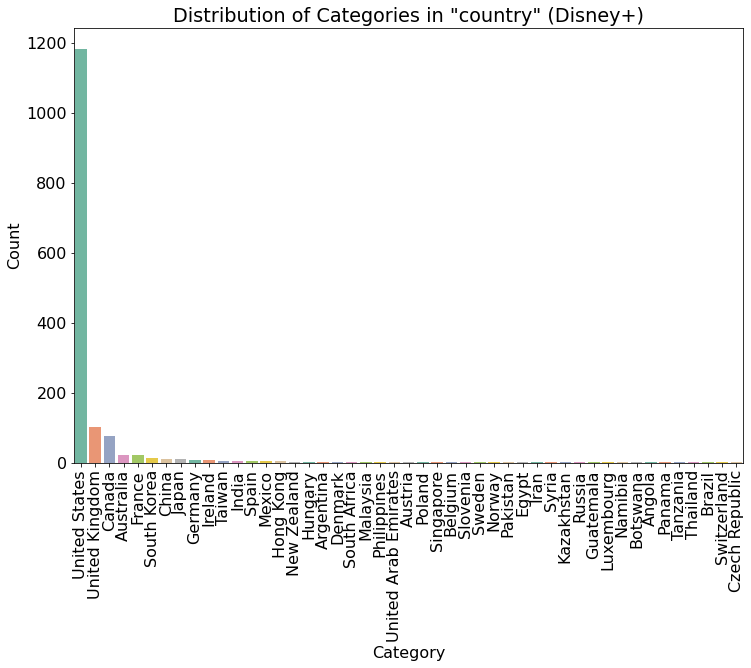

United States           1184
United Kingdom           101
Canada                    77
Australia                 23
France                    22
South Korea               13
China                     10
Japan                     10
Germany                    9
Ireland                    8
Taiwan                     6
India                      5
Spain                      4
Mexico                     4
Hong Kong                  4
New Zealand                3
Hungary                    3
Argentina                  3
Denmark                    3
South Africa               3
Malaysia                   2
Philippines                2
United Arab Emirates       2
Austria                    2
Poland                     2
Singapore                  2
Belgium                    1
Slovenia                   1
Sweden                     1
Norway                     1
Pakistan                   1
Egypt                      1
Iran                       1
Syria                      1
Kazakhstan    

In [170]:
# Disney
# NaN 값을 제거하고, 모든 항목을 세로로 쌓기
category_counts1 = split_categories1.stack().str.strip().value_counts()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts1.index, y=category_counts1.values, palette="Set2")
plt.xticks(rotation=90)
plt.title('Distribution of Categories in "country" (Disney+)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 세분화된 카테고리의 빈도 출력
print(category_counts1)

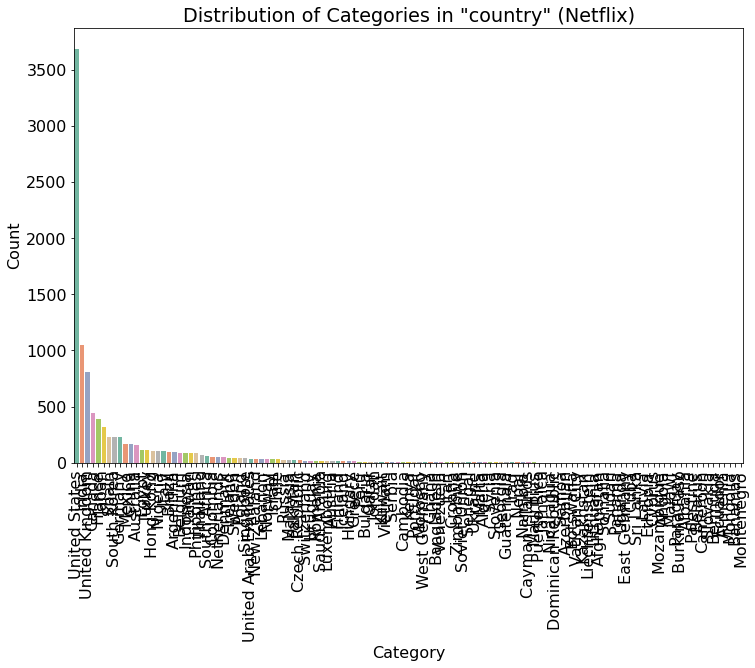

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Length: 123, dtype: int64


In [171]:
# Netflix
# NaN 값을 제거하고, 모든 항목을 세로로 쌓기
category_counts2 = split_categories2.stack().str.strip().value_counts()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts2.index, y=category_counts2.values, palette="Set2")
plt.xticks(rotation=90)
plt.title('Distribution of Categories in "country" (Netflix)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 세분화된 카테고리의 빈도 출력
print(category_counts2)

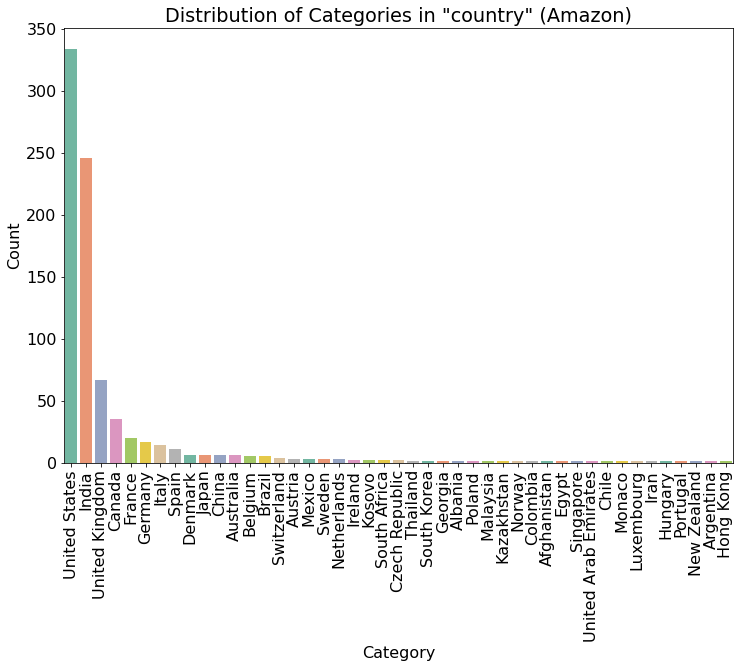

United States           334
India                   246
United Kingdom           67
Canada                   35
France                   20
Germany                  17
Italy                    14
Spain                    11
Denmark                   6
Japan                     6
China                     6
Australia                 6
Belgium                   5
Brazil                    5
Switzerland               4
Austria                   3
Mexico                    3
Sweden                    3
Netherlands               3
Ireland                   2
Kosovo                    2
South Africa              2
Czech Republic            2
Thailand                  1
South Korea               1
Georgia                   1
Albania                   1
Poland                    1
Malaysia                  1
Kazakhstan                1
Norway                    1
Colombia                  1
Afghanistan               1
Egypt                     1
Singapore                 1
United Arab Emirates

In [172]:
# Netflix
# NaN 값을 제거하고, 모든 항목을 세로로 쌓기
category_counts3 = split_categories3.stack().str.strip().value_counts()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts3.index, y=category_counts3.values, palette="Set2")
plt.xticks(rotation=90)
plt.title('Distribution of Categories in "country" (Amazon)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 세분화된 카테고리의 빈도 출력
print(category_counts3)

### 상위 10개 항목 + others

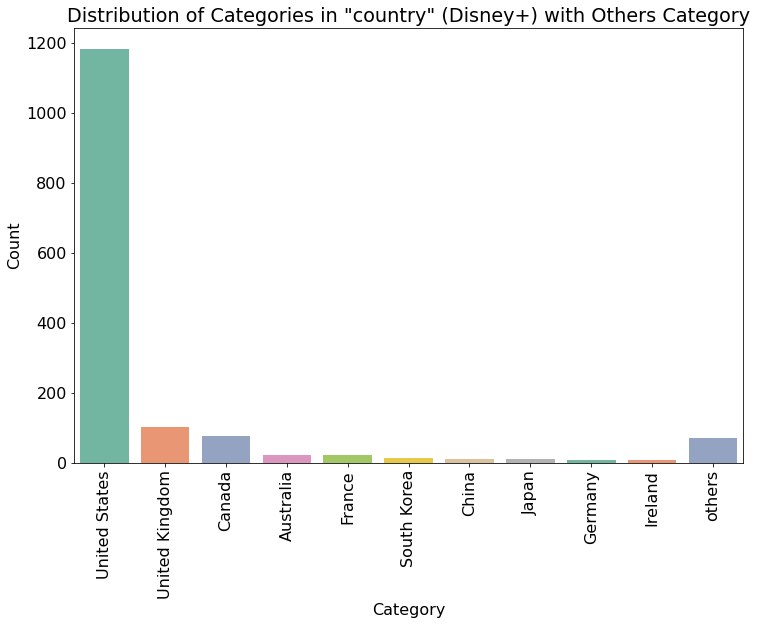

United States     1184
United Kingdom     101
Canada              77
Australia           23
France              22
South Korea         13
China               10
Japan               10
Germany              9
Ireland              8
others              71
dtype: int64


In [173]:
# NaN 값을 제거하고, 모든 항목을 세로로 쌓기
category_counts1 = split_categories1.stack().str.strip().value_counts()

# 상위 10개 항목을 추출하고 나머지는 "others"로 처리
top_10_categories = category_counts1.head(10)
others_count = category_counts1.iloc[10:].sum()

# "others" 카테고리 추가
category_counts1_modified = top_10_categories.append(pd.Series({'others': others_count}))

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts1_modified.index, y=category_counts1_modified.values, palette="Set2")
plt.xticks(rotation=90)
plt.title('Distribution of Categories in "country" (Disney+) with Others Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 세분화된 카테고리의 빈도 출력
print(category_counts1_modified)

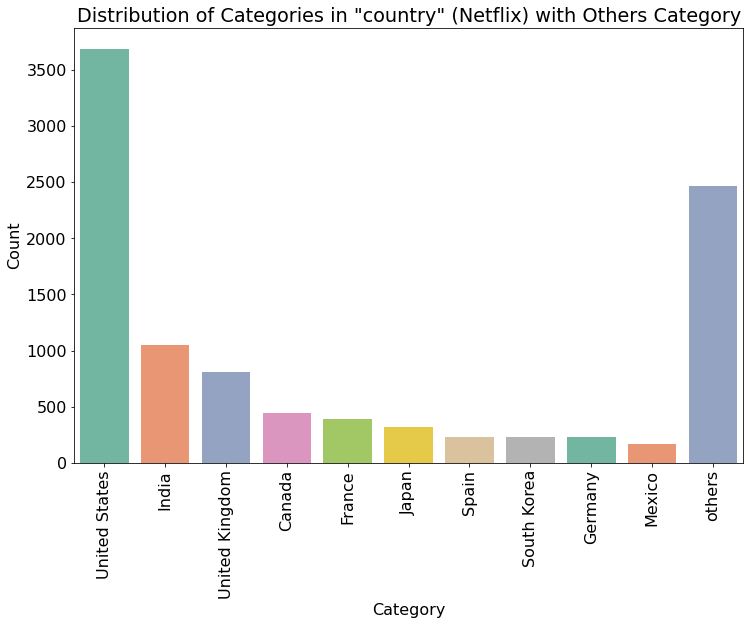

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
others            2463
dtype: int64


In [174]:
# NaN 값을 제거하고, 모든 항목을 세로로 쌓기
category_counts2 = split_categories2.stack().str.strip().value_counts()

# 상위 10개 항목을 추출하고 나머지는 "others"로 처리
top_10_categories = category_counts2.head(10)
others_count = category_counts2.iloc[10:].sum()

# "others" 카테고리 추가
category_counts2_modified = top_10_categories.append(pd.Series({'others': others_count}))

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts2_modified.index, y=category_counts2_modified.values, palette="Set2")
plt.xticks(rotation=90)
plt.title('Distribution of Categories in "country" (Netflix) with Others Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 세분화된 카테고리의 빈도 출력
print(category_counts2_modified)

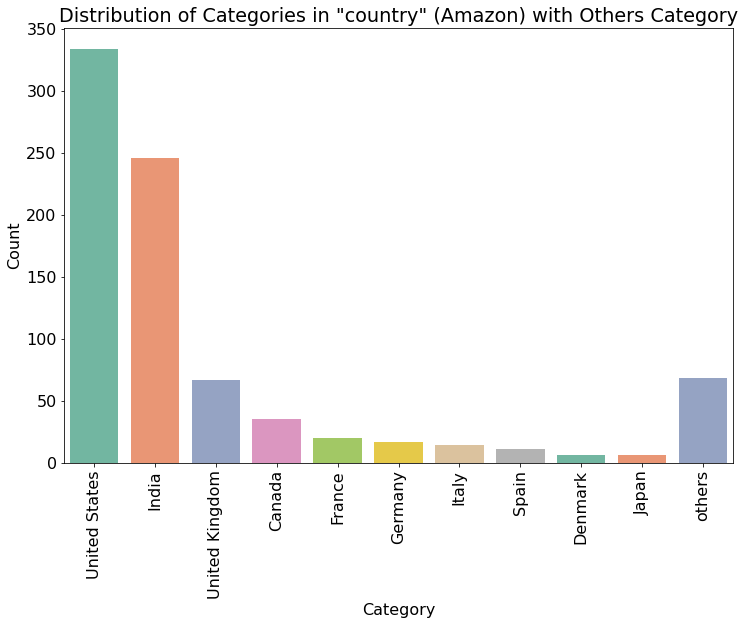

United States     334
India             246
United Kingdom     67
Canada             35
France             20
Germany            17
Italy              14
Spain              11
Denmark             6
Japan               6
others             68
dtype: int64


In [175]:
# NaN 값을 제거하고, 모든 항목을 세로로 쌓기
category_counts3 = split_categories3.stack().str.strip().value_counts()

# 상위 10개 항목을 추출하고 나머지는 "others"로 처리
top_10_categories = category_counts3.head(10)
others_count = category_counts3.iloc[10:].sum()

# "others" 카테고리 추가
category_counts3_modified = top_10_categories.append(pd.Series({'others': others_count}))

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts3_modified.index, y=category_counts3_modified.values, palette="Set2")
plt.xticks(rotation=90)
plt.title('Distribution of Categories in "country" (Amazon) with Others Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 세분화된 카테고리의 빈도 출력
print(category_counts3_modified)

## 가설1: 콘텐츠 유형에 따른 구독자 수 변화

### 'type' 컬럼 

In [176]:
for name, df in datasets.items():
    print(f"\nProcessing {name} Dataset")
    unique_values = df['type'].unique()
    unique_count = len(unique_values)
    print(f"Unique values in 'type' column ({unique_count}): {unique_values}")


Processing disney_plus Dataset
Unique values in 'type' column (2): ['Movie' 'TV Show']

Processing netflix Dataset
Unique values in 'type' column (2): ['Movie' 'TV Show']

Processing amazon_prime Dataset
Unique values in 'type' column (2): ['Movie' 'TV Show']



Processing disney_plus Dataset
Unique values in 'type' column (2):
Movie      1052
TV Show     398
Name: type, dtype: int64
Proportions of each 'type':
Movie      72.551724
TV Show    27.448276
Name: type, dtype: float64


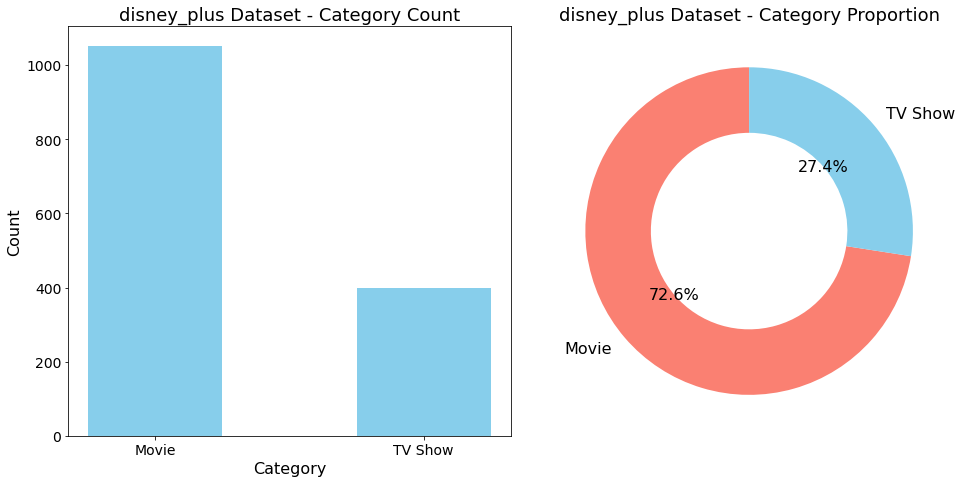


Processing netflix Dataset
Unique values in 'type' column (2):
Movie      6131
TV Show    2676
Name: type, dtype: int64
Proportions of each 'type':
Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64


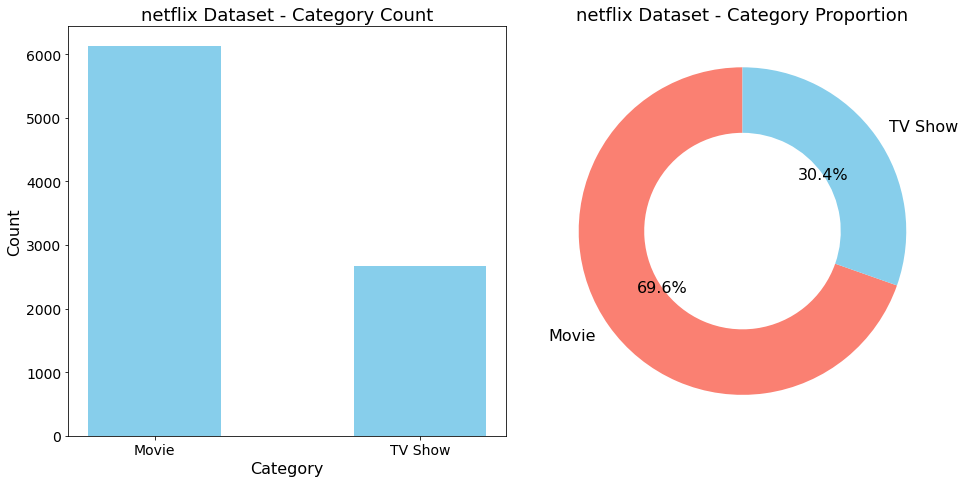


Processing amazon_prime Dataset
Unique values in 'type' column (2):
Movie      7814
TV Show    1854
Name: type, dtype: int64
Proportions of each 'type':
Movie      80.823335
TV Show    19.176665
Name: type, dtype: float64


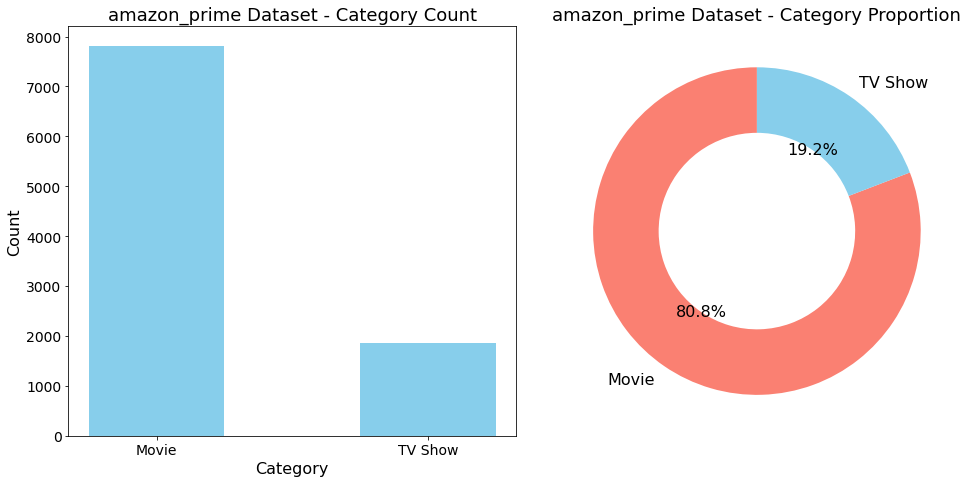

In [177]:
# 전역 폰트 크기 설정
plt.rcParams.update({'font.size': 16})  # 기본 폰트 크기를 16으로 설정

# 데이터셋마다 'type' 컬럼의 고유 값 개수와 비율 계산
for name, df in datasets.items():
    print(f"\nProcessing {name} Dataset")
    unique_values = df['type'].value_counts()
    unique_count = len(unique_values)
    total_count = len(df)
    unique_ratio = unique_values / total_count * 100  # 비율 계산
    print(f"Unique values in 'type' column ({unique_count}):\n{unique_values}")
    print(f"Proportions of each 'type':\n{unique_ratio}")

    # 고유 값의 개수와 비율을 막대그래프와 원형그래프 두 개로 시각화
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 전체 그래프 크기 유지

    # 첫 번째 그래프: 고유 값 개수 (막대 그래프)
    axes[0].bar(unique_values.index, unique_values.values, color='skyblue', width=0.5)  # 막대 너비 줄이기
    axes[0].set_title(f"{name} Dataset - Category Count", fontsize=18)  # 제목 크기 증가
    axes[0].set_xlabel('Category', fontsize=16)  # x축 레이블 크기 증가
    axes[0].set_ylabel('Count', fontsize=16)  # y축 레이블 크기 증가
    axes[0].tick_params(axis='x', rotation=0, labelsize=14)  # x축 레이블 크기 증가
    axes[0].tick_params(axis='y', labelsize=14)  # y축 레이블 크기 증가

    # 두 번째 그래프: 고유 값 비율 (원형 그래프)
    axes[1].pie(unique_ratio, labels=unique_ratio.index, autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue'],wedgeprops={'width': 0.4})
    axes[1].set_title(f"{name} Dataset - Category Proportion", fontsize=18)  # 제목 크기 증가

    # 그래프 레이아웃 조정
    plt.tight_layout()
    plt.show()


## 가설4: 장르별 인기 콘텐츠가 구독자 수에 미치는 영향

### 'listed_in' 컬럼

In [178]:
listed_in_values = df['listed_in'].unique()
listed_in_count = len(listed_in_values)
print(f"Unique values in 'listed_in' column ({listed_in_count}): {listed_in_values}")

Unique values in 'listed_in' column (518): ['Comedy, Drama' 'Drama, International' 'Action, Drama, Suspense'
 'Documentary' 'Drama, Fantasy' 'Fantasy, Kids'
 'Documentary, Special Interest' 'Comedy'
 'Action, Science Fiction, Suspense' 'Drama' 'Adventure, Kids'
 'Horror, Suspense' 'Documentary, Sports' 'Horror, Science Fiction'
 'Kids, Special Interest' 'Comedy, Talk Show and Variety'
 'Science Fiction' 'Kids' 'Action, Anime, Comedy'
 'Arts, Entertainment, and Culture, Comedy, Drama' 'TV Shows'
 'Animation, Anime, Fantasy' 'Action, Adventure, Animation' 'Anime, Kids'
 'Music Videos and Concerts' 'Drama, Suspense' 'Fitness, Special Interest'
 'Faith and Spirituality, Special Interest' 'Special Interest' 'Fitness'
 'Action, Military and War, Western'
 'Arts, Entertainment, and Culture, Comedy, Talk Show and Variety'
 'Action, Western' 'Documentary, Science Fiction'
 'Adventure, Animation, Kids' 'Fantasy, Science Fiction, Suspense'
 'Suspense' 'Action' 'Documentary, LGBTQ' 'Drama, Romance

In [179]:
# 'listed_in' 컬럼에서 고유한 값들을 세분화하여 새로운 컬럼 생성
df['listed_in_split'] = df['listed_in'].apply(lambda x: [item.strip() for item in x.split(',')])

# 각 카테고리별로 발생 횟수 세기
category_counter = Counter()
df['listed_in_split'].dropna().apply(category_counter.update)

# 세분화된 카테고리의 빈도 출력
print(f"Category frequencies in 'listed_in': {dict(category_counter)}")

Category frequencies in 'listed_in': {'Comedy': 2099, 'Drama': 3687, 'International': 355, 'Action': 1657, 'Suspense': 1501, 'Documentary': 993, 'Fantasy': 68, 'Kids': 1085, 'Special Interest': 980, 'Science Fiction': 457, 'Adventure': 259, 'Horror': 875, 'Sports': 160, 'Talk Show and Variety': 14, 'Anime': 80, 'Arts': 483, 'Entertainment': 483, 'and Culture': 483, 'TV Shows': 263, 'Animation': 547, 'Music Videos and Concerts': 155, 'Fitness': 83, 'Faith and Spirituality': 66, 'Military and War': 44, 'Western': 234, 'LGBTQ': 113, 'Romance': 674, 'Unscripted': 152, 'Young Adult Audience': 87, 'Arthouse': 141, 'Historical': 31}


                     Category  Frequency
1                       Drama       3687
0                      Comedy       2099
3                      Action       1657
4                    Suspense       1501
7                        Kids       1085
5                 Documentary        993
8            Special Interest        980
11                     Horror        875
26                    Romance        674
19                  Animation        547
17                and Culture        483
16              Entertainment        483
15                       Arts        483
9             Science Fiction        457
2               International        355
18                   TV Shows        263
10                  Adventure        259
24                    Western        234
12                     Sports        160
20  Music Videos and Concerts        155
27                 Unscripted        152
29                   Arthouse        141
25                      LGBTQ        113
28       Young A

<Figure size 720x432 with 0 Axes>

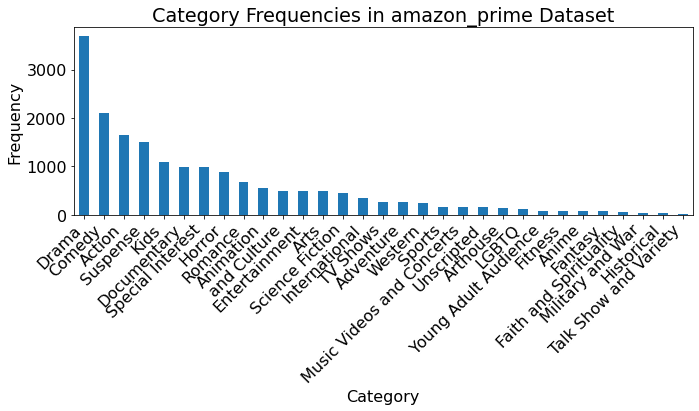

In [180]:
    # 표로 시각화
    category_freq_df = pd.DataFrame(category_counter.items(), columns=['Category', 'Frequency']).sort_values(by='Frequency', ascending=False)
    print(category_freq_df)

    # 막대 그래프 시각화
    plt.figure(figsize=(10, 6))
    category_freq_df.plot(kind='bar', x='Category', y='Frequency', figsize=(10, 6), legend=False)
    plt.title(f"Category Frequencies in {name} Dataset")
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<Figure size 1440x864 with 0 Axes>

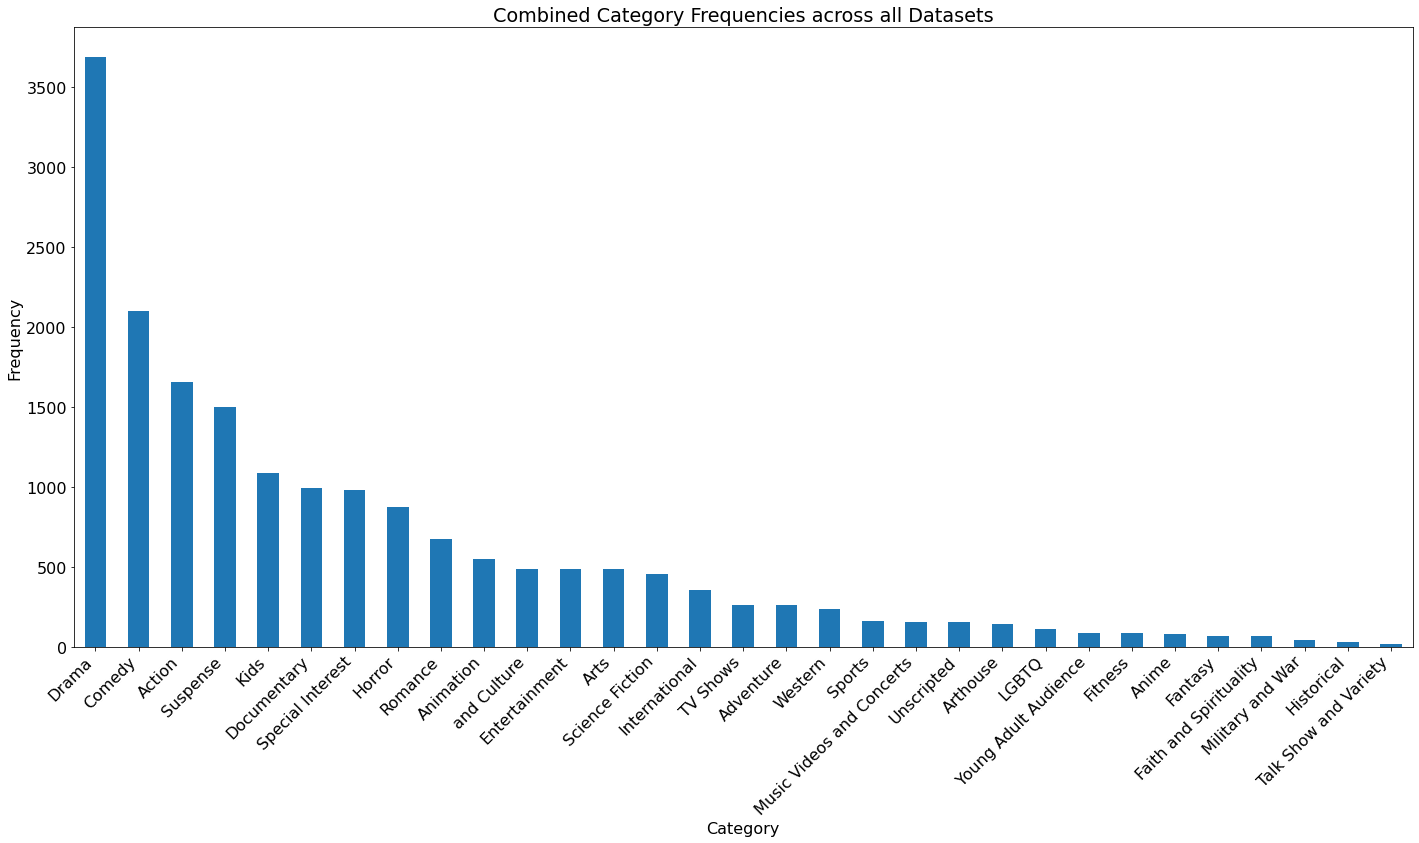

In [181]:
# 여러 데이터셋에 대한 막대 그래프를 함께 시각화 (옵션)
combined_counter = Counter()
for df in datasets.values():
    if 'listed_in_split' in df.columns:
        df['listed_in_split'].dropna().apply(combined_counter.update)

combined_freq_df = pd.DataFrame(combined_counter.items(), columns=['Category', 'Frequency']).sort_values(by='Frequency', ascending=False)
plt.figure(figsize=(20, 12))
combined_freq_df.plot(kind='bar', x='Category', y='Frequency', figsize=(20, 12),legend=False)
plt.title("Combined Category Frequencies across all Datasets")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Disney Plus Dataset

In [182]:
# Disney Plus Dataset
print("\nProcessing disney_plus Dataset")

disney_df = datasets['disney_plus']

# 고유 값 추출 및 카운팅
listed_in_values = disney_df['listed_in'].dropna().unique()
listed_in_count = len(listed_in_values)
print(f"Unique values in 'listed_in' column ({listed_in_count}): {listed_in_values}")

# 'listed_in' 컬럼 분리
disney_df['listed_in_split'] = disney_df['listed_in'].dropna().apply(lambda x: [item.strip() for item in x.split(',')])

# 카테고리 빈도 계산
disney_counter = Counter()
disney_df['listed_in_split'].apply(disney_counter.update)


Processing disney_plus Dataset
Unique values in 'listed_in' column (329): ['Animation, Family' 'Comedy' 'Animation, Comedy, Family' 'Musical'
 'Docuseries, Historical, Music' 'Biographical, Documentary'
 'Action-Adventure, Superhero' 'Docuseries, Reality, Survival'
 'Animals & Nature, Docuseries, Family' 'Comedy, Family, Musical'
 'Documentary' 'Comedy, Family, Music' 'Documentary, Family'
 'Action-Adventure, Animals & Nature, Docuseries' 'Animals & Nature'
 'Animation' 'Animation, Kids' 'Comedy, Coming of Age, Drama'
 'Comedy, Family, Fantasy' 'Animation, Comedy, Drama'
 'Animation, Family, Fantasy' 'Action-Adventure, Animation, Comedy'
 'Comedy, Family' 'Action-Adventure, Comedy, Family' 'Lifestyle' 'Movies'
 'Action-Adventure, Science Fiction'
 'Action-Adventure, Fantasy, Superhero' 'Coming of Age, Music'
 'Animation, Drama' 'Concert Film, Music'
 'Animation, Comedy, Coming of Age' 'Animation, Comedy'
 'Animation, Crime, Family' 'Science Fiction' 'Action-Adventure, Fantasy'
 'Comed

0       None
1       None
2       None
3       None
4       None
        ... 
1445    None
1446    None
1447    None
1448    None
1449    None
Name: listed_in_split, Length: 1450, dtype: object

                   Category  Frequency
1                    Family        632
0                 Animation        542
2                    Comedy        526
9          Action-Adventure        452
13         Animals & Nature        208
15            Coming of Age        205
17                  Fantasy        192
8               Documentary        174
14                     Kids        141
16                    Drama        134
4                Docuseries        122
20          Science Fiction         91
5                Historical         53
6                     Music         48
3                   Musical         44
23                   Sports         43
7              Biographical         41
28                    Buddy         40
24                Anthology         28
11                  Reality         26
31                  Romance         20
10                Superhero         19
22                    Crime         16
26                  Variety         12
40                  Myste

<Figure size 1440x864 with 0 Axes>

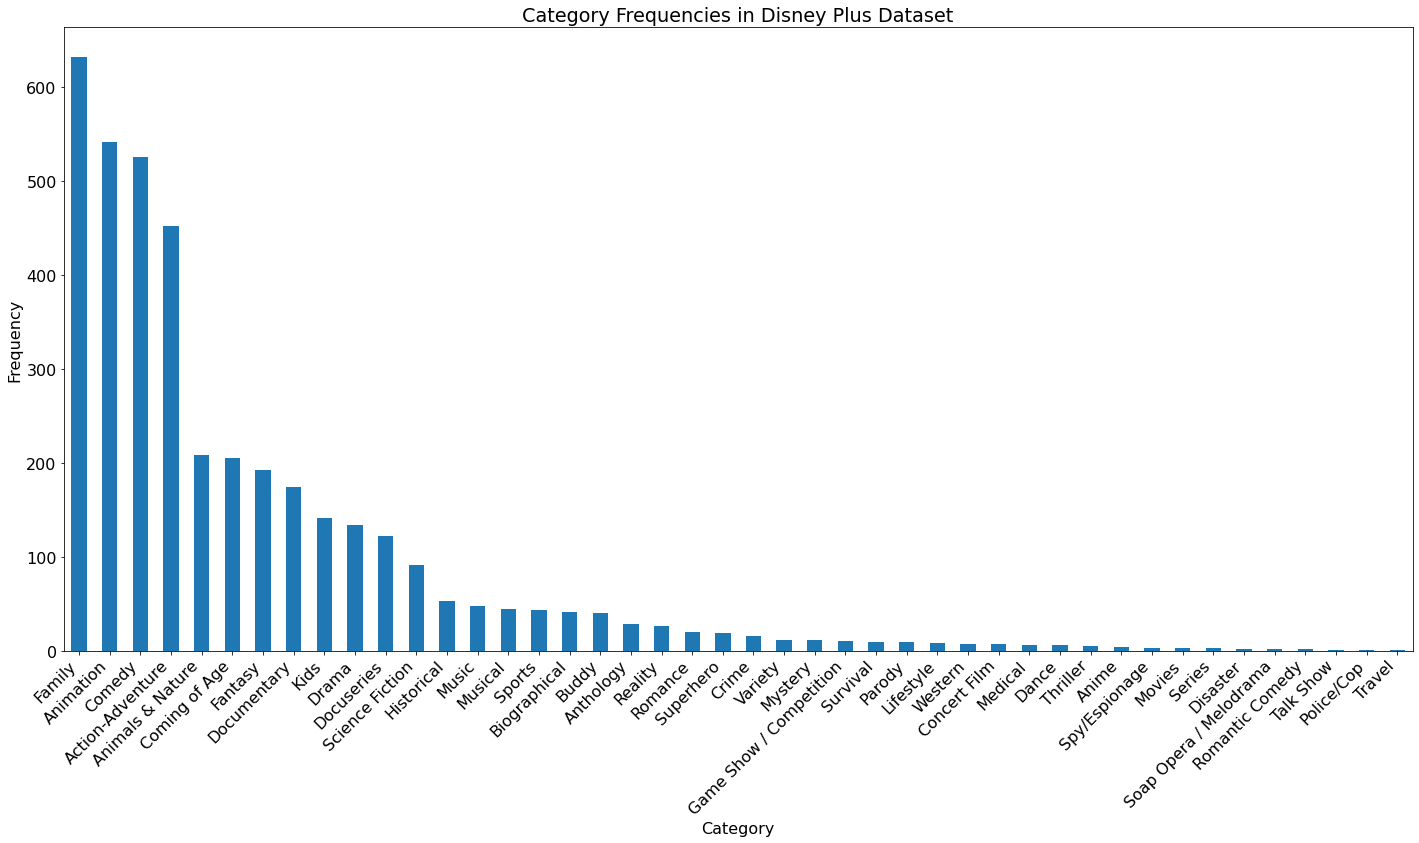

In [183]:
# 데이터프레임 변환 및 시각화
disney_freq_df = pd.DataFrame(disney_counter.items(), columns=['Category', 'Frequency']).sort_values(by='Frequency', ascending=False)
print(disney_freq_df)

# 그래프 시각화
plt.figure(figsize=(20, 12))
disney_freq_df.plot(kind='bar', x='Category', y='Frequency', figsize=(20, 12), legend=False)
plt.title("Category Frequencies in Disney Plus Dataset")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [184]:
# Disney Plus 데이터셋 처리
print("\nProcessing disney_plus Dataset")

disney_df = datasets['disney_plus']

# 'listed_in' 컬럼을 문자열로 변환 (리스트가 포함된 경우를 방지)
disney_df['listed_in'] = disney_df['listed_in'].apply(
    lambda x: ', '.join(x) if isinstance(x, list) else x
)

# 고유 값 추출 및 카운팅
listed_in_values = disney_df['listed_in'].dropna().unique()
listed_in_count = len(listed_in_values)
print(f"Unique values in 'listed_in' column ({listed_in_count}): {listed_in_values}")

# 'listed_in' 컬럼을 쉼표로 분리하여 각 항목을 리스트로 저장
disney_df['listed_in_split'] = disney_df['listed_in'].dropna().apply(
    lambda x: [item.strip() for item in x.split(',')]
)

# 카테고리 빈도 계산
disney_counter = Counter()
disney_df['listed_in_split'].apply(disney_counter.update)

# 장르 매핑 딕셔너리
genre_mapping = {
    "Animation": "Anime",
    "Comedy": "Comedy",
    "Action-Adventure": "Action & Adventure",
    "Animals & Nature": "Documentary",
    "Coming of Age": "Drama",
    "Fantasy": "Action & Adventure",
    "Documentary": "Documentary",
    "Kids": "Kids",
    "Drama": "Drama",
    "Docuseries": "Documentary",
    "Science Fiction": "Action & Adventure",
    "Historical": "Documentary",
    "Music": "Music & Musical",
    "Musical": "Music & Musical",
    "Sports": "TV Show",
    "Biographical": "Documentary",
    "Buddy": "Comedy",
    "Anthology": "Drama",
    "Reality": "TV Show",
    "Romance": "Romantic",
    "Superhero": "Action & Adventure",
    "Crime": "Drama",
    "Variety": "Comedy",
    "Mystery": "Drama",
    "Game Show / Competition": "TV Show",
    "Survival": "Action & Adventure",
    "Parody": "Comedy",
    "Lifestyle": "Documentary",
    "Western": "Action & Adventure",
    "Concert Film": "Music & Musical",
    "Medical": "Drama",
    "Dance": "Music & Musical",
    "Thriller": "Horror",
    "Anime": "Anime",
    "Spy/Espionage": "Action & Adventure",
    "Movies": "TV Show",
    "Series": "TV Show",
    "Disaster": "Action & Adventure",
    "Soap Opera / Melodrama": "Drama",
    "Romantic Comedy": "Romantic",
    "Talk Show": "TV Show",
    "Police/Cop": "Drama",
    "Travel": "Documentary",
    "Family": "Drama"  # Family를 Drama로 변경
}

# 장르 매핑 함수 (리스트에 적용)
def map_genres_list(genres):
    if not isinstance(genres, list):
        return genres
    return [genre_mapping.get(genre.strip(), genre.strip()) for genre in genres]

# 데이터프레임에서 매핑 적용
disney_df['listed_in_mapped'] = disney_df['listed_in_split'].apply(map_genres_list)

# 결과 확인
print(disney_df[['listed_in_split', 'listed_in_mapped']].head())


Processing disney_plus Dataset
Unique values in 'listed_in' column (329): ['Animation, Family' 'Comedy' 'Animation, Comedy, Family' 'Musical'
 'Docuseries, Historical, Music' 'Biographical, Documentary'
 'Action-Adventure, Superhero' 'Docuseries, Reality, Survival'
 'Animals & Nature, Docuseries, Family' 'Comedy, Family, Musical'
 'Documentary' 'Comedy, Family, Music' 'Documentary, Family'
 'Action-Adventure, Animals & Nature, Docuseries' 'Animals & Nature'
 'Animation' 'Animation, Kids' 'Comedy, Coming of Age, Drama'
 'Comedy, Family, Fantasy' 'Animation, Comedy, Drama'
 'Animation, Family, Fantasy' 'Action-Adventure, Animation, Comedy'
 'Comedy, Family' 'Action-Adventure, Comedy, Family' 'Lifestyle' 'Movies'
 'Action-Adventure, Science Fiction'
 'Action-Adventure, Fantasy, Superhero' 'Coming of Age, Music'
 'Animation, Drama' 'Concert Film, Music'
 'Animation, Comedy, Coming of Age' 'Animation, Comedy'
 'Animation, Crime, Family' 'Science Fiction' 'Action-Adventure, Fantasy'
 'Comed

In [185]:
# 'listed_in' 컬럼을 쉼표로 분리하여 각 항목을 리스트로 저장
disney_df['listed_in_split'] = disney_df['listed_in'].dropna().apply(
    lambda x: [item.strip() for item in x.split(',')]
)

# 중복된 장르를 제거
disney_df['listed_in_split'] = disney_df['listed_in_split'].apply(lambda x: list(set(x)))

# 카테고리 빈도 계산
disney_counter = Counter()
disney_df['listed_in_split'].apply(disney_counter.update)

# 장르 매핑 함수 (리스트에 적용)
def map_genres_list(genres):
    if not isinstance(genres, list):
        return genres
    return [genre_mapping.get(genre.strip(), genre.strip()) for genre in genres]

# 데이터프레임에서 매핑 적용
disney_df['listed_in_mapped'] = disney_df['listed_in_split'].apply(map_genres_list)

# 결과 확인
print(disney_df[['listed_in_split', 'listed_in_mapped']].head())

                   listed_in_split  \
0              [Family, Animation]   
1                         [Comedy]   
2      [Family, Comedy, Animation]   
3                        [Musical]   
4  [Historical, Docuseries, Music]   

                              listed_in_mapped  
0                               [Drama, Anime]  
1                                     [Comedy]  
2                       [Drama, Comedy, Anime]  
3                            [Music & Musical]  
4  [Documentary, Documentary, Music & Musical]  


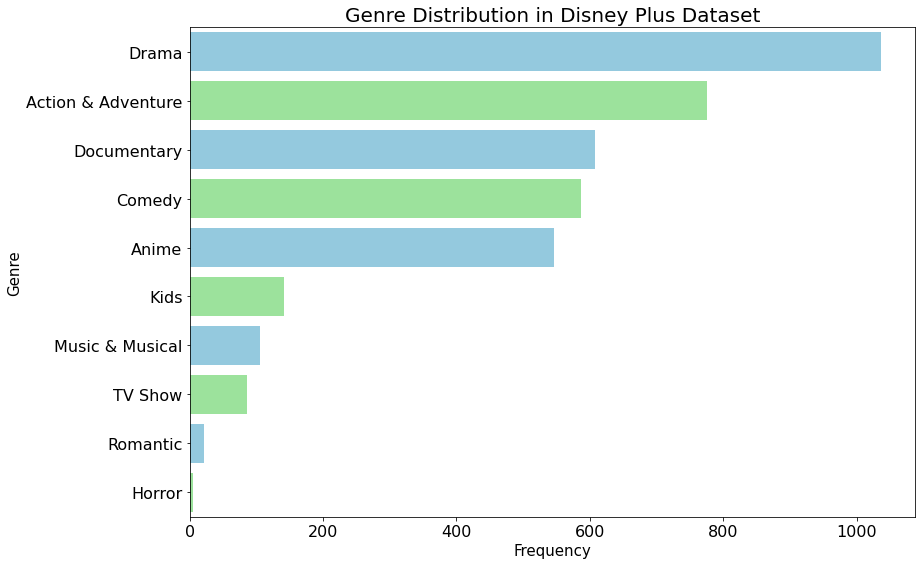

                Genre  Frequency
0               Drama       1036
1  Action & Adventure        775
2         Documentary        607
3              Comedy        587
4               Anime        546
5                Kids        141
6     Music & Musical        105
7             TV Show         86
8            Romantic         22
9              Horror          5


In [186]:
# 장르별 빈도 계산
genre_freq = disney_df['listed_in_mapped'].explode().value_counts()

# 데이터프레임으로 변환
genre_freq_df = genre_freq.reset_index()
genre_freq_df.columns = ['Genre', 'Frequency']

# seaborn을 사용한 그래프 시각화
plt.figure(figsize=(12, 8))  # 그래프 크기 설정

# 색상을 스카이블루와 라이트그린으로 설정
sns.barplot(x='Frequency', y='Genre', data=genre_freq_df, palette=['skyblue', 'lightgreen'])

# 그래프 제목 및 레이블 설정
plt.title("Genre Distribution in Disney Plus Dataset", fontsize=20)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Genre', fontsize=15)

# 여백을 조금 더 확보하여 그래프가 작아지지 않도록 처리
plt.subplots_adjust(left=0.08, right=0.92, top=0.95, bottom=0.1)

# 그래프 출력
plt.show()

# 결과 확인
print(genre_freq_df)

### Netflix Dataset

In [187]:
# Netflix Dataset
print("\nProcessing netflix Dataset")

netflix_df = datasets['netflix']

# 고유 값 추출 및 카운팅
listed_in_values = netflix_df['listed_in'].dropna().unique()
listed_in_count = len(listed_in_values)
print(f"Unique values in 'listed_in' column ({listed_in_count}): {listed_in_values}")

# 'listed_in' 컬럼 분리
netflix_df['listed_in_split'] = netflix_df['listed_in'].dropna().apply(lambda x: [item.strip() for item in x.split(',')])

# 카테고리 빈도 계산
netflix_counter = Counter()
netflix_df['listed_in_split'].apply(netflix_counter.update)


Processing netflix Dataset
Unique values in 'listed_in' column (514): ['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas'
 'Comedies, International Movies'
 'Comedies, International Movies, Romantic Movies'
 'Docuseries, Interna

0       None
1       None
2       None
3       None
4       None
        ... 
8802    None
8803    None
8804    None
8805    None
8806    None
Name: listed_in_split, Length: 8807, dtype: object

                        Category  Frequency
14          International Movies       2752
12                        Dramas       2427
16                      Comedies       1674
1         International TV Shows       1351
0                  Documentaries        869
25            Action & Adventure        859
2                      TV Dramas        763
13            Independent Movies        756
11      Children & Family Movies        641
19               Romantic Movies        616
9                    TV Comedies        581
18                     Thrillers        577
4                 Crime TV Shows        470
24                      Kids' TV        451
6                     Docuseries        395
20              Music & Musicals        375
8              Romantic TV Shows        370
21                 Horror Movies        357
38               Stand-Up Comedy        343
7                     Reality TV        255
15              British TV Shows        253
22              Sci-Fi & Fantasy

<Figure size 1440x864 with 0 Axes>

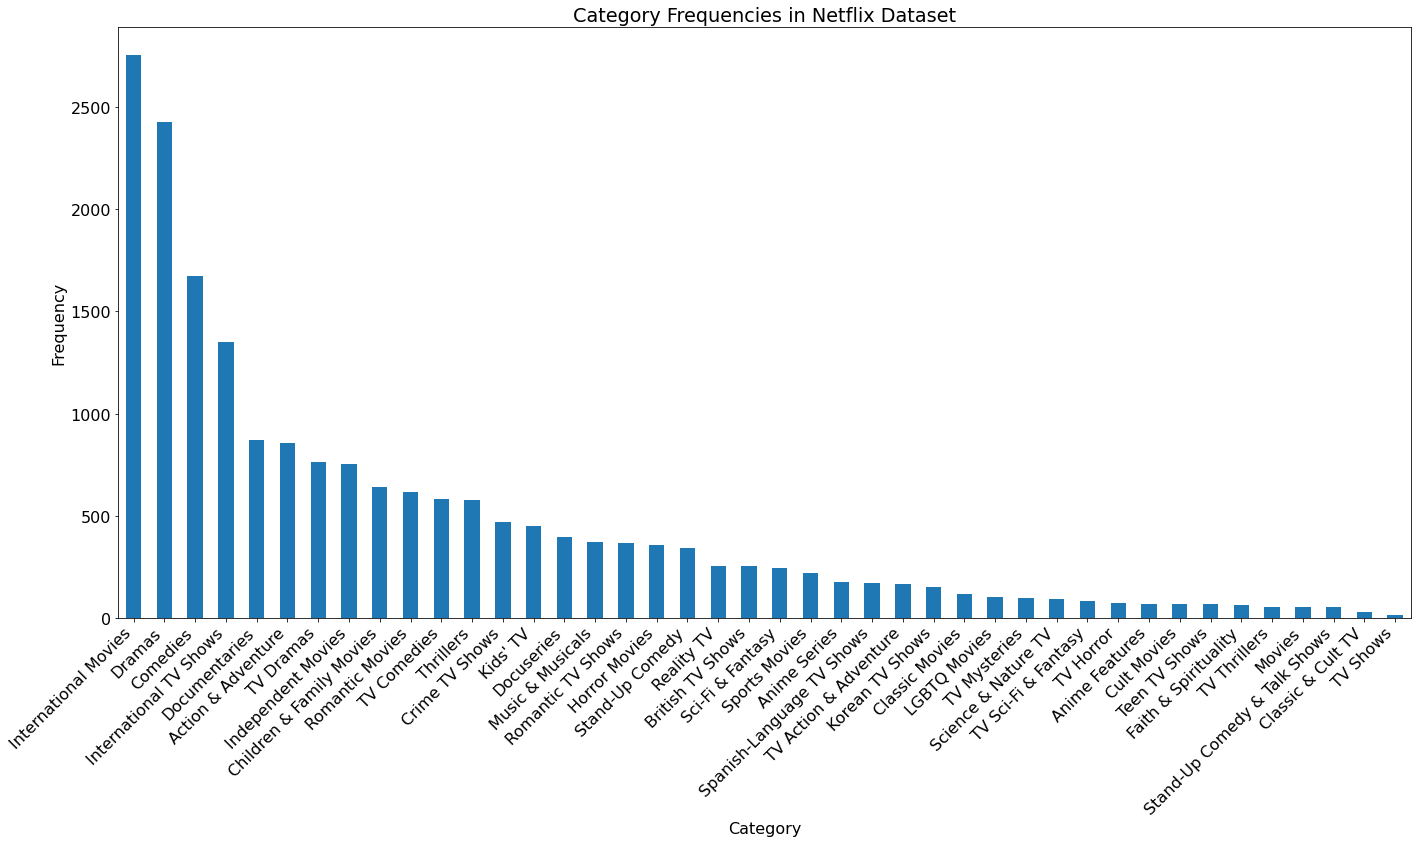

In [188]:
# 데이터프레임 변환 및 시각화
netflix_freq_df = pd.DataFrame(netflix_counter.items(), columns=['Category', 'Frequency']).sort_values(by='Frequency', ascending=False)
print(netflix_freq_df)

# 그래프 시각화
plt.figure(figsize=(20, 12))
netflix_freq_df.plot(kind='bar', x='Category', y='Frequency', figsize=(20, 12), legend=False)
plt.title("Category Frequencies in Netflix Dataset")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [189]:
# 넷플릭스 장르 매핑 딕셔너리
netflix_genre_mapping = {
    "International Movies": "TV Show",
    "Dramas": "Drama",
    "Comedies": "Comedy",
    "International TV Shows": "TV Show",
    "Documentaries": "Documentary",
    "Action & Adventure": "Action & Adventure",
    "TV Dramas": "Drama",
    "Independent Movies": "Drama",
    "Children & Family Movies": "Kids",
    "Romantic Movies": "Romantic",
    "TV Comedies": "Comedy",
    "Thrillers": "Horror",
    "Crime TV Shows": "Drama",
    "Kids' TV": "Kids",  # 수정된 부분: 'Kids’ TV'에서 'Kids' TV'로 매핑
    "Docuseries": "Documentary",
    "Music & Musicals": "Music & Musical",
    "Romantic TV Shows": "Romantic",
    "Horror Movies": "Horror",
    "Stand-Up Comedy": "Comedy",
    "Reality TV": "TV Show",
    "British TV Shows": "TV Show",
    "Sci-Fi & Fantasy": "Action & Adventure",
    "Sports Movies": "TV Show",
    "Anime Series": "Anime",
    "Spanish-Language TV Shows": "TV Show",
    "TV Action & Adventure": "Action & Adventure",
    "Korean TV Shows": "TV Show",
    "Classic Movies": "TV Show",
    "LGBTQ Movies": "Drama",
    "TV Mysteries": "Drama",
    "Science & Nature TV": "Documentary",
    "TV Sci-Fi & Fantasy": "Action & Adventure",
    "TV Horror": "Horror",
    "Anime Features": "Anime",
    "Cult Movies": "Horror",
    "Teen TV Shows": "TV Show",
    "Faith & Spirituality": "Documentary",
    "TV Thrillers": "Horror",
    "Movies": "TV Show",
    "Stand-Up Comedy & Talk Shows": "Comedy",
    "Classic & Cult TV": "TV Show",
    "TV Shows": "TV Show"
}

# 장르 매핑 함수 (리스트에 적용)
def map_genres_list(genres):
    if not isinstance(genres, list):
        return genres
    mapped_genres = [netflix_genre_mapping.get(genre.strip(), genre.strip()) for genre in genres]
    return mapped_genres

# 데이터프레임에서 매핑 적용
netflix_df['listed_in_mapped'] = netflix_df['listed_in_split'].apply(map_genres_list)

# 결과 확인
print(netflix_df[['listed_in_split', 'listed_in_mapped']].head())

                                     listed_in_split  \
0                                    [Documentaries]   
1  [International TV Shows, TV Dramas, TV Mysteries]   
2  [Crime TV Shows, International TV Shows, TV Ac...   
3                           [Docuseries, Reality TV]   
4  [International TV Shows, Romantic TV Shows, TV...   

                       listed_in_mapped  
0                         [Documentary]  
1               [TV Show, Drama, Drama]  
2  [Drama, TV Show, Action & Adventure]  
3                [Documentary, TV Show]  
4           [TV Show, Romantic, Comedy]  


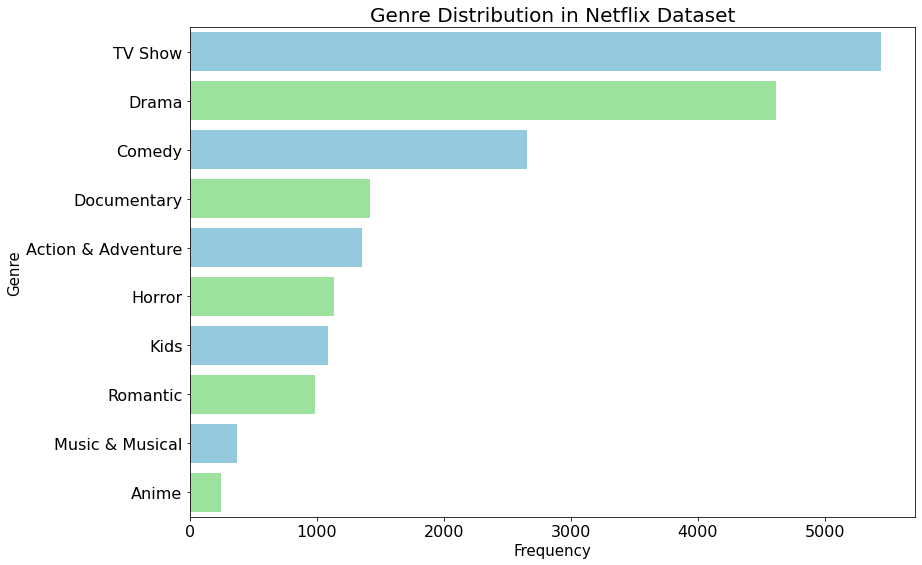

                Genre  Frequency
0             TV Show       5441
1               Drama       4616
2              Comedy       2654
3         Documentary       1421
4  Action & Adventure       1354
5              Horror       1137
6                Kids       1092
7            Romantic        986
8     Music & Musical        375
9               Anime        247


In [190]:
# 장르별 빈도 계산
genre_freq = netflix_df['listed_in_mapped'].explode().value_counts()

# 데이터프레임으로 변환
genre_freq_df = genre_freq.reset_index()
genre_freq_df.columns = ['Genre', 'Frequency']

# seaborn을 사용한 그래프 시각화
plt.figure(figsize=(12, 8))  # 그래프 크기 설정

# 색상을 스카이블루와 라이트그린으로 설정
sns.barplot(x='Frequency', y='Genre', data=genre_freq_df, palette=['skyblue', 'lightgreen'])

# 그래프 제목 및 레이블 설정
plt.title("Genre Distribution in Netflix Dataset", fontsize=20)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Genre', fontsize=15)

# 여백을 조금 더 확보하여 그래프가 작아지지 않도록 처리
plt.subplots_adjust(left=0.08, right=0.92, top=0.95, bottom=0.1)

# 그래프 출력
plt.show()

# 결과 확인
print(genre_freq_df)

### Amazon Prime Dataset

In [191]:
# Amazon Prime Dataset
print("\nProcessing amazon_prime Dataset")

amazon_df = datasets['amazon_prime']

# 고유 값 추출 및 카운팅
listed_in_values = amazon_df['listed_in'].dropna().unique()
listed_in_count = len(listed_in_values)
print(f"Unique values in 'listed_in' column ({listed_in_count}): {listed_in_values}")

# 'listed_in' 컬럼 분리
amazon_df['listed_in_split'] = amazon_df['listed_in'].dropna().apply(lambda x: [item.strip() for item in x.split(',')])

# 카테고리 빈도 계산
amazon_counter = Counter()
amazon_df['listed_in_split'].apply(amazon_counter.update)


Processing amazon_prime Dataset
Unique values in 'listed_in' column (518): ['Comedy, Drama' 'Drama, International' 'Action, Drama, Suspense'
 'Documentary' 'Drama, Fantasy' 'Fantasy, Kids'
 'Documentary, Special Interest' 'Comedy'
 'Action, Science Fiction, Suspense' 'Drama' 'Adventure, Kids'
 'Horror, Suspense' 'Documentary, Sports' 'Horror, Science Fiction'
 'Kids, Special Interest' 'Comedy, Talk Show and Variety'
 'Science Fiction' 'Kids' 'Action, Anime, Comedy'
 'Arts, Entertainment, and Culture, Comedy, Drama' 'TV Shows'
 'Animation, Anime, Fantasy' 'Action, Adventure, Animation' 'Anime, Kids'
 'Music Videos and Concerts' 'Drama, Suspense' 'Fitness, Special Interest'
 'Faith and Spirituality, Special Interest' 'Special Interest' 'Fitness'
 'Action, Military and War, Western'
 'Arts, Entertainment, and Culture, Comedy, Talk Show and Variety'
 'Action, Western' 'Documentary, Science Fiction'
 'Adventure, Animation, Kids' 'Fantasy, Science Fiction, Suspense'
 'Suspense' 'Action' 'Do

0       None
1       None
2       None
3       None
4       None
        ... 
9663    None
9664    None
9665    None
9666    None
9667    None
Name: listed_in_split, Length: 9668, dtype: object

                     Category  Frequency
1                       Drama       3687
0                      Comedy       2099
3                      Action       1657
4                    Suspense       1501
7                        Kids       1085
5                 Documentary        993
8            Special Interest        980
11                     Horror        875
26                    Romance        674
19                  Animation        547
17                and Culture        483
16              Entertainment        483
15                       Arts        483
9             Science Fiction        457
2               International        355
18                   TV Shows        263
10                  Adventure        259
24                    Western        234
12                     Sports        160
20  Music Videos and Concerts        155
27                 Unscripted        152
29                   Arthouse        141
25                      LGBTQ        113
28       Young A

<Figure size 5000x600 with 0 Axes>

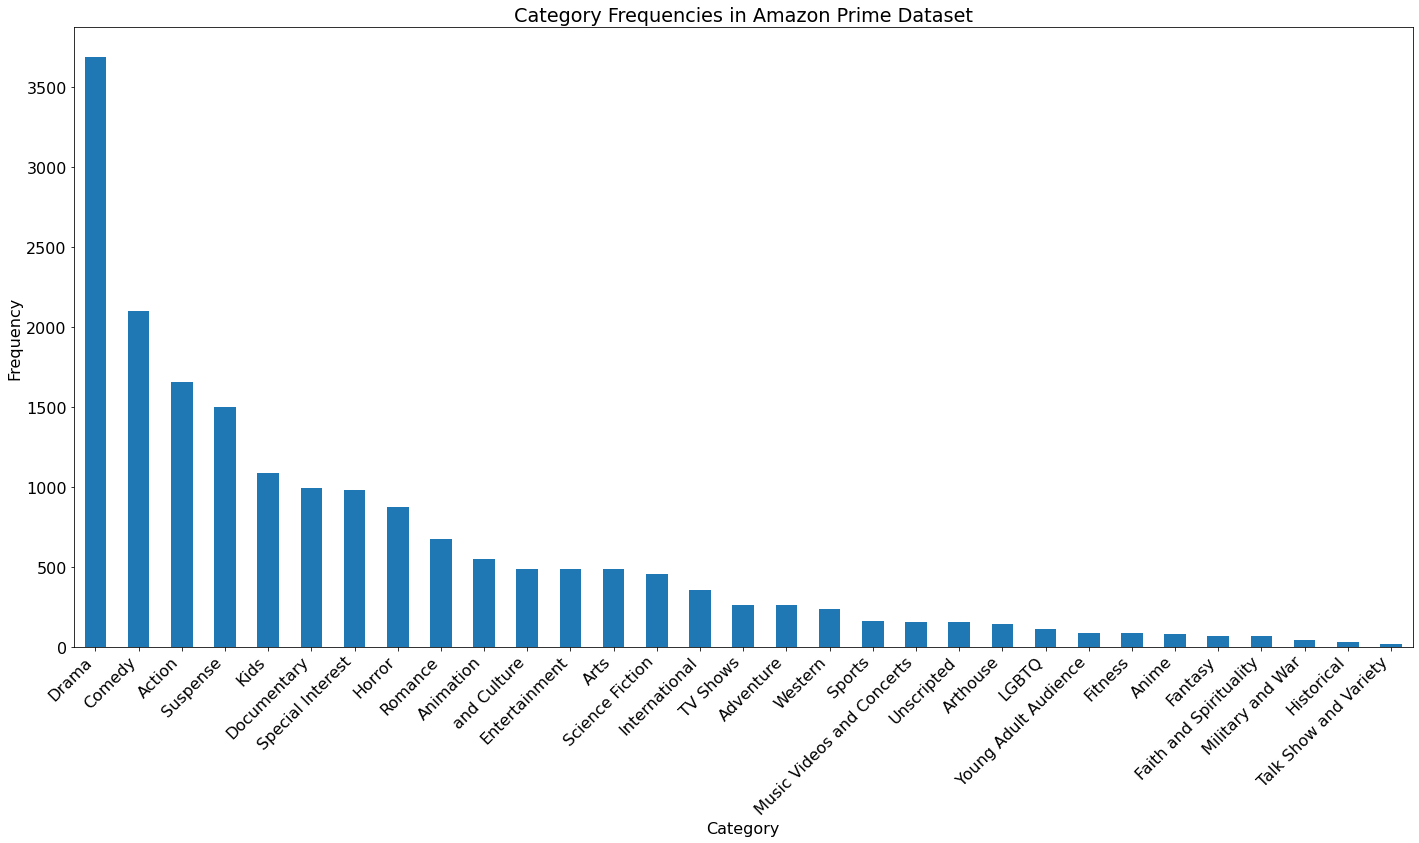

In [192]:
# 데이터프레임 변환 및 시각화
amazon_freq_df = pd.DataFrame(amazon_counter.items(), columns=['Category', 'Frequency']).sort_values(by='Frequency', ascending=False)
print(amazon_freq_df)

# 그래프 시각화
plt.figure(figsize=(50, 6), dpi=100)
amazon_freq_df.plot(kind='bar', x='Category', y='Frequency', figsize=(20, 12), legend=False)
plt.title("Category Frequencies in Amazon Prime Dataset")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [193]:
# 아마존 프라임 장르 매핑 딕셔너리
amazon_prime_genre_mapping = {
    "Drama": "Drama",
    "Comedy": "Comedy",
    "Action": "Action & Adventure",
    "Suspense": "Horror",
    "Kids": "Kids",
    "Documentary": "Documentary",
    "Special Interest": "TV Show",
    "Horror": "Horror",
    "Romance": "Romantic",
    "Animation": "Anime",
    "and Culture": "Documentary",
    "Entertainment": "TV Show",
    "Arts": "Documentary",
    "Science Fiction": "Action & Adventure",
    "International": "TV Show",
    "TV Shows": "TV Show",
    "Adventure": "Action & Adventure",
    "Western": "Action & Adventure",
    "Sports": "TV Show",
    "Music Videos and Concerts": "Music & Musical",
    "Unscripted": "TV Show",
    "Arthouse": "Drama",
    "LGBTQ": "Drama",
    "Young Adult Audience": "Kids",
    "Fitness": "TV Show",
    "Anime": "Anime",
    "Fantasy": "Action & Adventure",
    "Faith and Spirituality": "Documentary",
    "Military and War": "Action & Adventure",
    "Historical": "Documentary",
    "Talk Show and Variety": "TV Show"
}

# 아마존 프라임 데이터셋 처리
print("\nProcessing amazon_prime_df Dataset")

amazon_prime_df = datasets['amazon_prime']

# 'listed_in' 컬럼을 문자열로 변환 (리스트가 포함된 경우를 방지)
amazon_prime_df['listed_in'] = amazon_prime_df['listed_in'].apply(
    lambda x: ', '.join(x) if isinstance(x, list) else x
)

# 고유 값 추출 및 카운팅
listed_in_values = amazon_prime_df['listed_in'].dropna().unique()
listed_in_count = len(listed_in_values)
print(f"Unique values in 'listed_in' column ({listed_in_count}): {listed_in_values}")

# 'listed_in' 컬럼을 쉼표로 분리하여 각 항목을 리스트로 저장
amazon_prime_df['listed_in_split'] = amazon_prime_df['listed_in'].dropna().apply(
    lambda x: [item.strip() for item in x.split(',')]
)

# 카테고리 빈도 계산
amazon_prime_counter = Counter()
amazon_prime_df['listed_in_split'].apply(amazon_prime_counter.update)

# 장르 매핑 함수 (리스트에 적용)
def map_genres_list(genres):
    if not isinstance(genres, list):
        return genres
    return [amazon_prime_genre_mapping.get(genre.strip(), genre.strip()) for genre in genres]

# 데이터프레임에서 매핑 적용
amazon_prime_df['listed_in_mapped'] = amazon_prime_df['listed_in_split'].apply(map_genres_list)

# 결과 확인
print(amazon_prime_df[['listed_in_split', 'listed_in_mapped']].head())


Processing amazon_prime_df Dataset
Unique values in 'listed_in' column (518): ['Comedy, Drama' 'Drama, International' 'Action, Drama, Suspense'
 'Documentary' 'Drama, Fantasy' 'Fantasy, Kids'
 'Documentary, Special Interest' 'Comedy'
 'Action, Science Fiction, Suspense' 'Drama' 'Adventure, Kids'
 'Horror, Suspense' 'Documentary, Sports' 'Horror, Science Fiction'
 'Kids, Special Interest' 'Comedy, Talk Show and Variety'
 'Science Fiction' 'Kids' 'Action, Anime, Comedy'
 'Arts, Entertainment, and Culture, Comedy, Drama' 'TV Shows'
 'Animation, Anime, Fantasy' 'Action, Adventure, Animation' 'Anime, Kids'
 'Music Videos and Concerts' 'Drama, Suspense' 'Fitness, Special Interest'
 'Faith and Spirituality, Special Interest' 'Special Interest' 'Fitness'
 'Action, Military and War, Western'
 'Arts, Entertainment, and Culture, Comedy, Talk Show and Variety'
 'Action, Western' 'Documentary, Science Fiction'
 'Adventure, Animation, Kids' 'Fantasy, Science Fiction, Suspense'
 'Suspense' 'Action' 

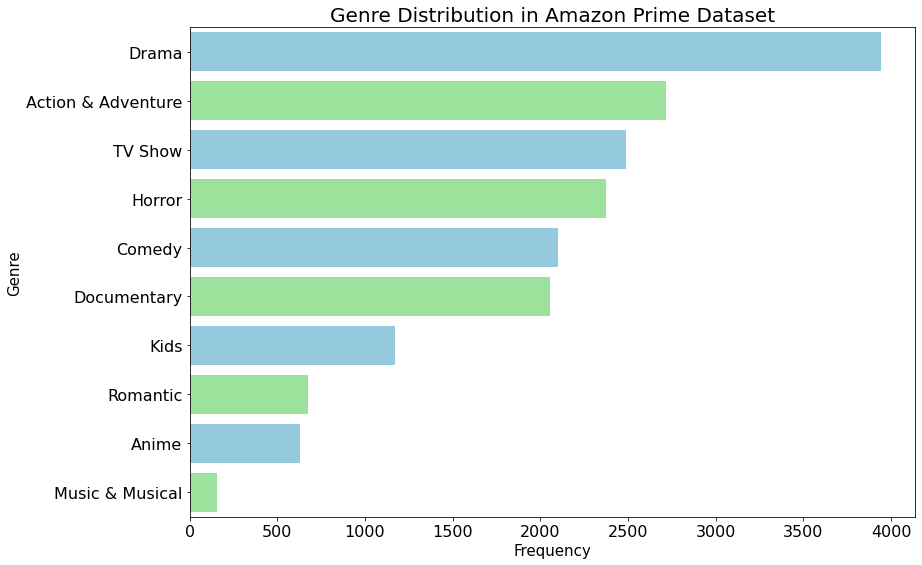

                Genre  Frequency
0               Drama       3941
1  Action & Adventure       2719
2             TV Show       2490
3              Horror       2376
4              Comedy       2099
5         Documentary       2056
6                Kids       1172
7            Romantic        674
8               Anime        627
9     Music & Musical        155


In [194]:
# 장르별 빈도 계산
genre_freq_amazon_prime = amazon_prime_df['listed_in_mapped'].explode().value_counts()

# 데이터프레임으로 변환
genre_freq_df_amazon_prime = genre_freq_amazon_prime.reset_index()
genre_freq_df_amazon_prime.columns = ['Genre', 'Frequency']

# seaborn을 사용한 그래프 시각화
plt.figure(figsize=(12, 8))  # 그래프 크기 설정

# 색상을 스카이블루와 라이트그린으로 설정
sns.barplot(x='Frequency', y='Genre', data=genre_freq_df_amazon_prime, palette=['skyblue', 'lightgreen'])

# 그래프 제목 및 레이블 설정
plt.title("Genre Distribution in Amazon Prime Dataset", fontsize=20)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Genre', fontsize=15)

# 여백을 조금 더 확보하여 그래프가 작아지지 않도록 처리
plt.subplots_adjust(left=0.08, right=0.92, top=0.95, bottom=0.1)

# 그래프 출력
plt.show()

# 결과 확인
print(genre_freq_df_amazon_prime)

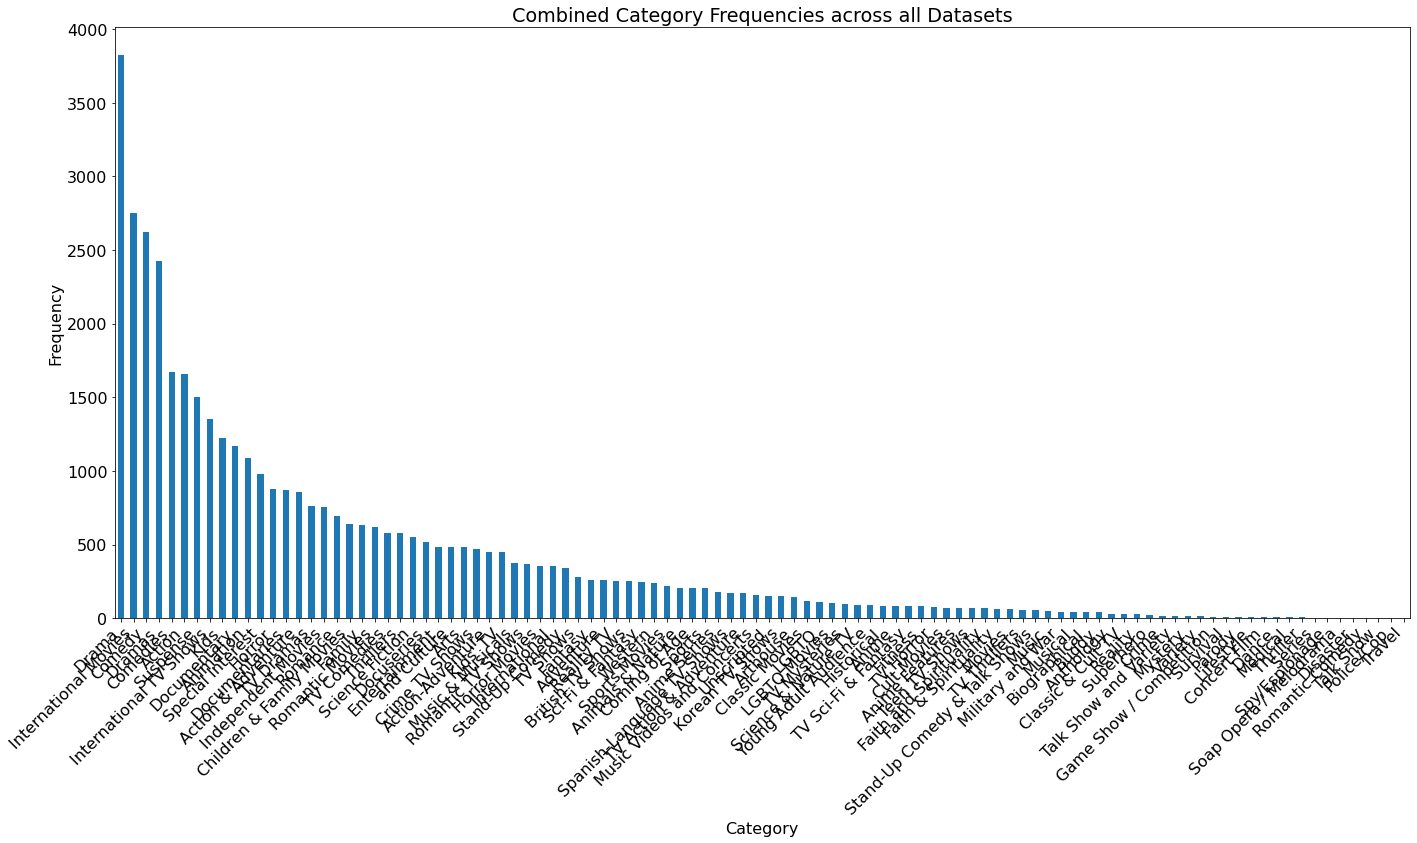

In [195]:
# 모든 데이터셋의 'listed_in' 컬럼을 결합하여 처리
combined_counter = Counter()

# 각 데이터셋에서 카테고리 빈도를 결합
for name, df in datasets.items():
    if 'listed_in' in df.columns:
        df['listed_in_split'] = df['listed_in'].dropna().apply(lambda x: [item.strip() for item in x.split(',')])
        df['listed_in_split'].apply(combined_counter.update)

# 카테고리 빈도를 데이터프레임으로 변환
combined_freq_df = pd.DataFrame(combined_counter.items(), columns=['Category', 'Frequency']).sort_values(by='Frequency', ascending=False)

# 결합된 데이터를 막대 그래프로 시각화

combined_freq_df.plot(kind='bar', x='Category', y='Frequency', figsize=(20, 12), legend=False)
plt.title("Combined Category Frequencies across all Datasets")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

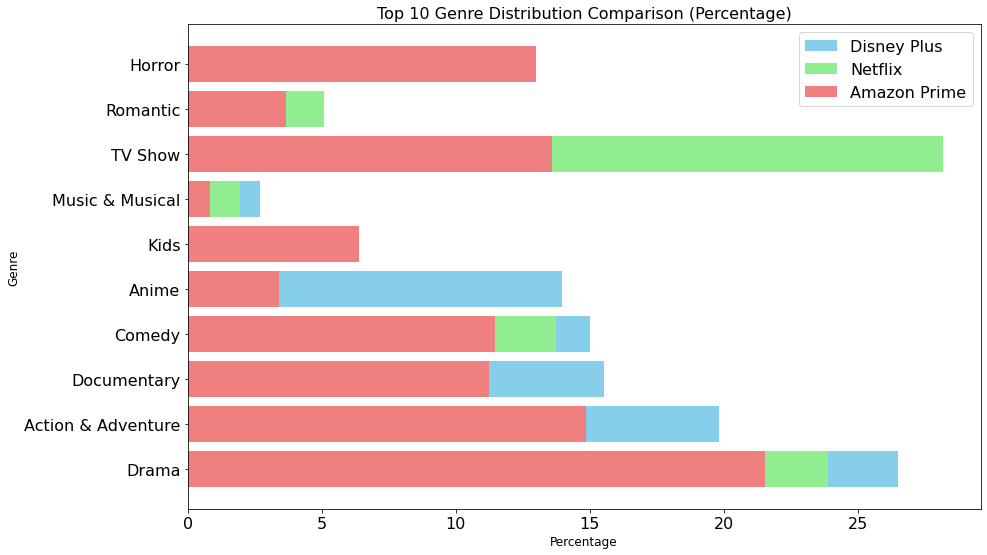

In [196]:
# 장르별 빈도 계산
disney_genre_freq = disney_df['listed_in_mapped'].explode().value_counts()
netflix_genre_freq = netflix_df['listed_in_mapped'].explode().value_counts()
amazon_prime_genre_freq = amazon_prime_df['listed_in_mapped'].explode().value_counts()

# 각 장르별 빈도 비율 계산 후 DataFrame으로 변환
disney_genre_freq_df = pd.DataFrame({
    'Genre': disney_genre_freq.index,
    'Percentage': disney_genre_freq.values / disney_genre_freq.sum() * 100
})

netflix_genre_freq_df = pd.DataFrame({
    'Genre': netflix_genre_freq.index,
    'Percentage': netflix_genre_freq.values / netflix_genre_freq.sum() * 100
})

amazon_prime_genre_freq_df = pd.DataFrame({
    'Genre': amazon_prime_genre_freq.index,
    'Percentage': amazon_prime_genre_freq.values / amazon_prime_genre_freq.sum() * 100
})

# Top 10 장르만 추출
disney_genre_freq_df = disney_genre_freq_df.head(10)
netflix_genre_freq_df = netflix_genre_freq_df.head(10)
amazon_prime_genre_freq_df = amazon_prime_genre_freq_df.head(10)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 8))

# 디즈니
ax.barh(disney_genre_freq_df['Genre'], disney_genre_freq_df['Percentage'], color='skyblue', label='Disney Plus')

# 넷플릭스
ax.barh(netflix_genre_freq_df['Genre'], netflix_genre_freq_df['Percentage'], color='lightgreen', label='Netflix')

# 아마존 프라임
ax.barh(amazon_prime_genre_freq_df['Genre'], amazon_prime_genre_freq_df['Percentage'], color='lightcoral', label='Amazon Prime')

# 그래프 제목 및 레이블 설정
ax.set_title("Top 10 Genre Distribution Comparison (Percentage)", fontsize=16)
ax.set_xlabel("Percentage", fontsize=12)
ax.set_ylabel("Genre", fontsize=12)

# 여백을 자동으로 최적화하고 레이블 겹침 방지
plt.tight_layout()

# 범례 추가
ax.legend()

# 그래프 출력
plt.show()

<Figure size 2880x2160 with 0 Axes>

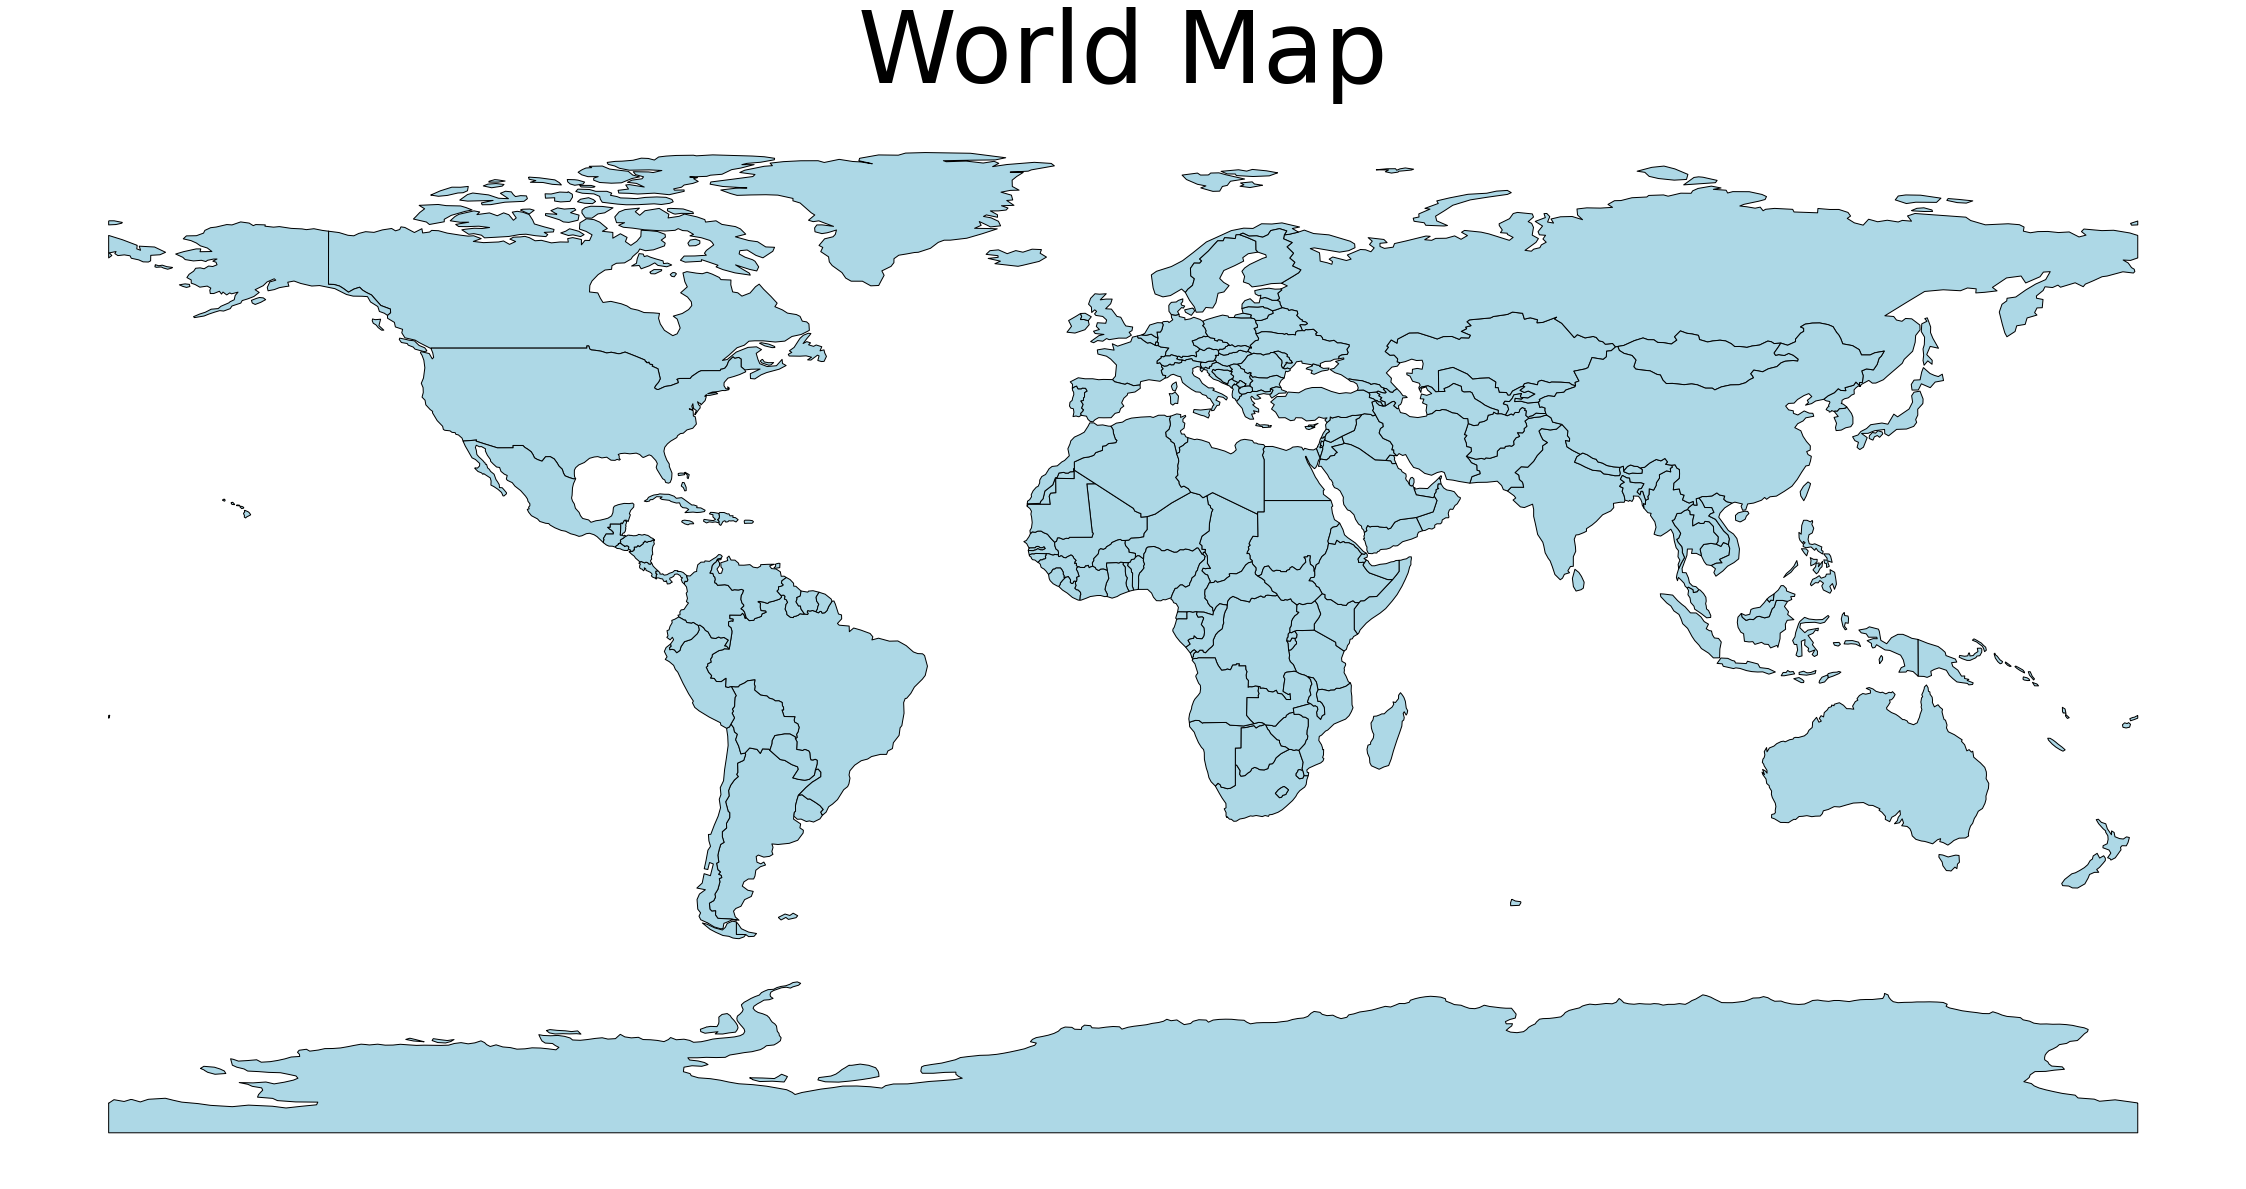

In [197]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 세계 지도 데이터 불러오기
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 지도 그리기
plt.figure(figsize=(40, 30))  # 매우 큰 크기 설정  # 크기를 크게 설정
world.plot(color='lightblue', edgecolor='black', figsize=(40, 30))

# 제목 추가
plt.title('World Map', fontsize=100)

# 축 레이블 제거
plt.axis('off')

# 그래프 출력
plt.show()

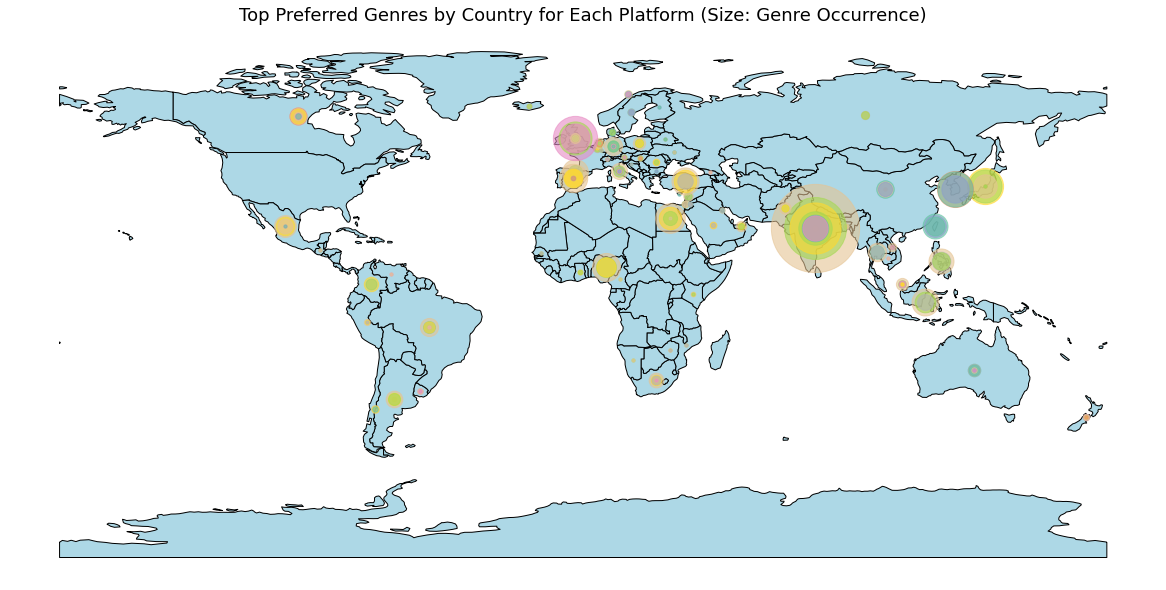

In [198]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from shapely.geometry import Point

# 각 데이터셋을 처리하는 함수 정의
def analyze_top_genres_by_country(df, platform):
    # 'listed_in'이 이미 리스트 형태일 수 있기 때문에 이를 확인하고 처리
    if isinstance(df['listed_in'].iloc[0], str):
        df['listed_in'] = df['listed_in'].apply(lambda x: x.split(','))  # 문자열을 리스트로 변환

    # 국가별로 선호하는 장르를 집계
    country_genres = {}

    for idx, row in df.iterrows():
        country = row['country']
        genres = row['listed_in']
        
        # 국가별로 장르 리스트를 추가
        if country in country_genres:
            country_genres[country].extend(genres)
        else:
            country_genres[country] = genres

    # 국가별로 장르가 가장 많이 등장하는 순서대로 분석
    country_top_genres = {}

    for country, genres in country_genres.items():
        genre_count = Counter(genres)  # 장르별 등장 횟수 계산
        top_genres = genre_count.most_common(3)  # 상위 3개 장르 추출
        country_top_genres[country] = top_genres

    # 국가와 장르, 횟수 정보를 리스트로 변환
    genre_data = []
    for country, top_genres in country_top_genres.items():
        for genre, count in top_genres:
            genre_data.append((country, genre, count, platform))

    # 데이터프레임으로 변환
    genre_df = pd.DataFrame(genre_data, columns=['Country', 'Genre', 'Count', 'Platform'])

    return genre_df

# 각 플랫폼의 데이터셋에 대해 장르 분석
disney_genre_df = analyze_top_genres_by_country(disney_df, 'Disney')
netflix_genre_df = analyze_top_genres_by_country(netflix_df, 'Netflix')
amazon_genre_df = analyze_top_genres_by_country(amazon_df, 'Amazon')

# 모든 플랫폼의 장르 데이터를 합침
all_genre_df = pd.concat([disney_genre_df, netflix_genre_df, amazon_genre_df])

# 세계 지도 데이터 불러오기
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 국가별 좌표를 나타내기 위한 데이터프레임 만들기
# 'Country' 컬럼을 이용하여 world와 merge
merged = world.set_index('name').join(all_genre_df.set_index('Country'))

# 국가별로 선호하는 장르가 있는 경우에만 점 표시
fig, ax = plt.subplots(figsize=(20, 15))

# 세계 지도 그리기
world.plot(ax=ax, color='lightblue', edgecolor='black')

# 고유 장르 수에 맞는 색상 생성
genre_colors = sns.color_palette("Set2", n_colors=len(all_genre_df['Genre'].unique()))

# 각 국가에 점을 찍기 (Count가 클수록 점 크기 커짐)
for _, row in merged.iterrows():
    if pd.notna(row['Count']):  # Count 값이 있을 경우에만 표시
        genre_index = all_genre_df['Genre'].unique().tolist().index(row['Genre'])
        ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y,
                   s=row['Count']*10,  # Count에 비례하여 점의 크기 조정
                   color=genre_colors[genre_index],  # 고유 장르에 맞는 색상 적용
                   alpha=0.6)

# 제목 및 레이블 설정
plt.title('Top Preferred Genres by Country for Each Platform (Size: Genre Occurrence)', fontsize=18)
plt.axis('off')
plt.tight_layout()  # 레이아웃 자동 조정
plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.1)  # 여백 조정 (top 값을 작게 하여 제목과 그래프 간격 조정)
plt.show()

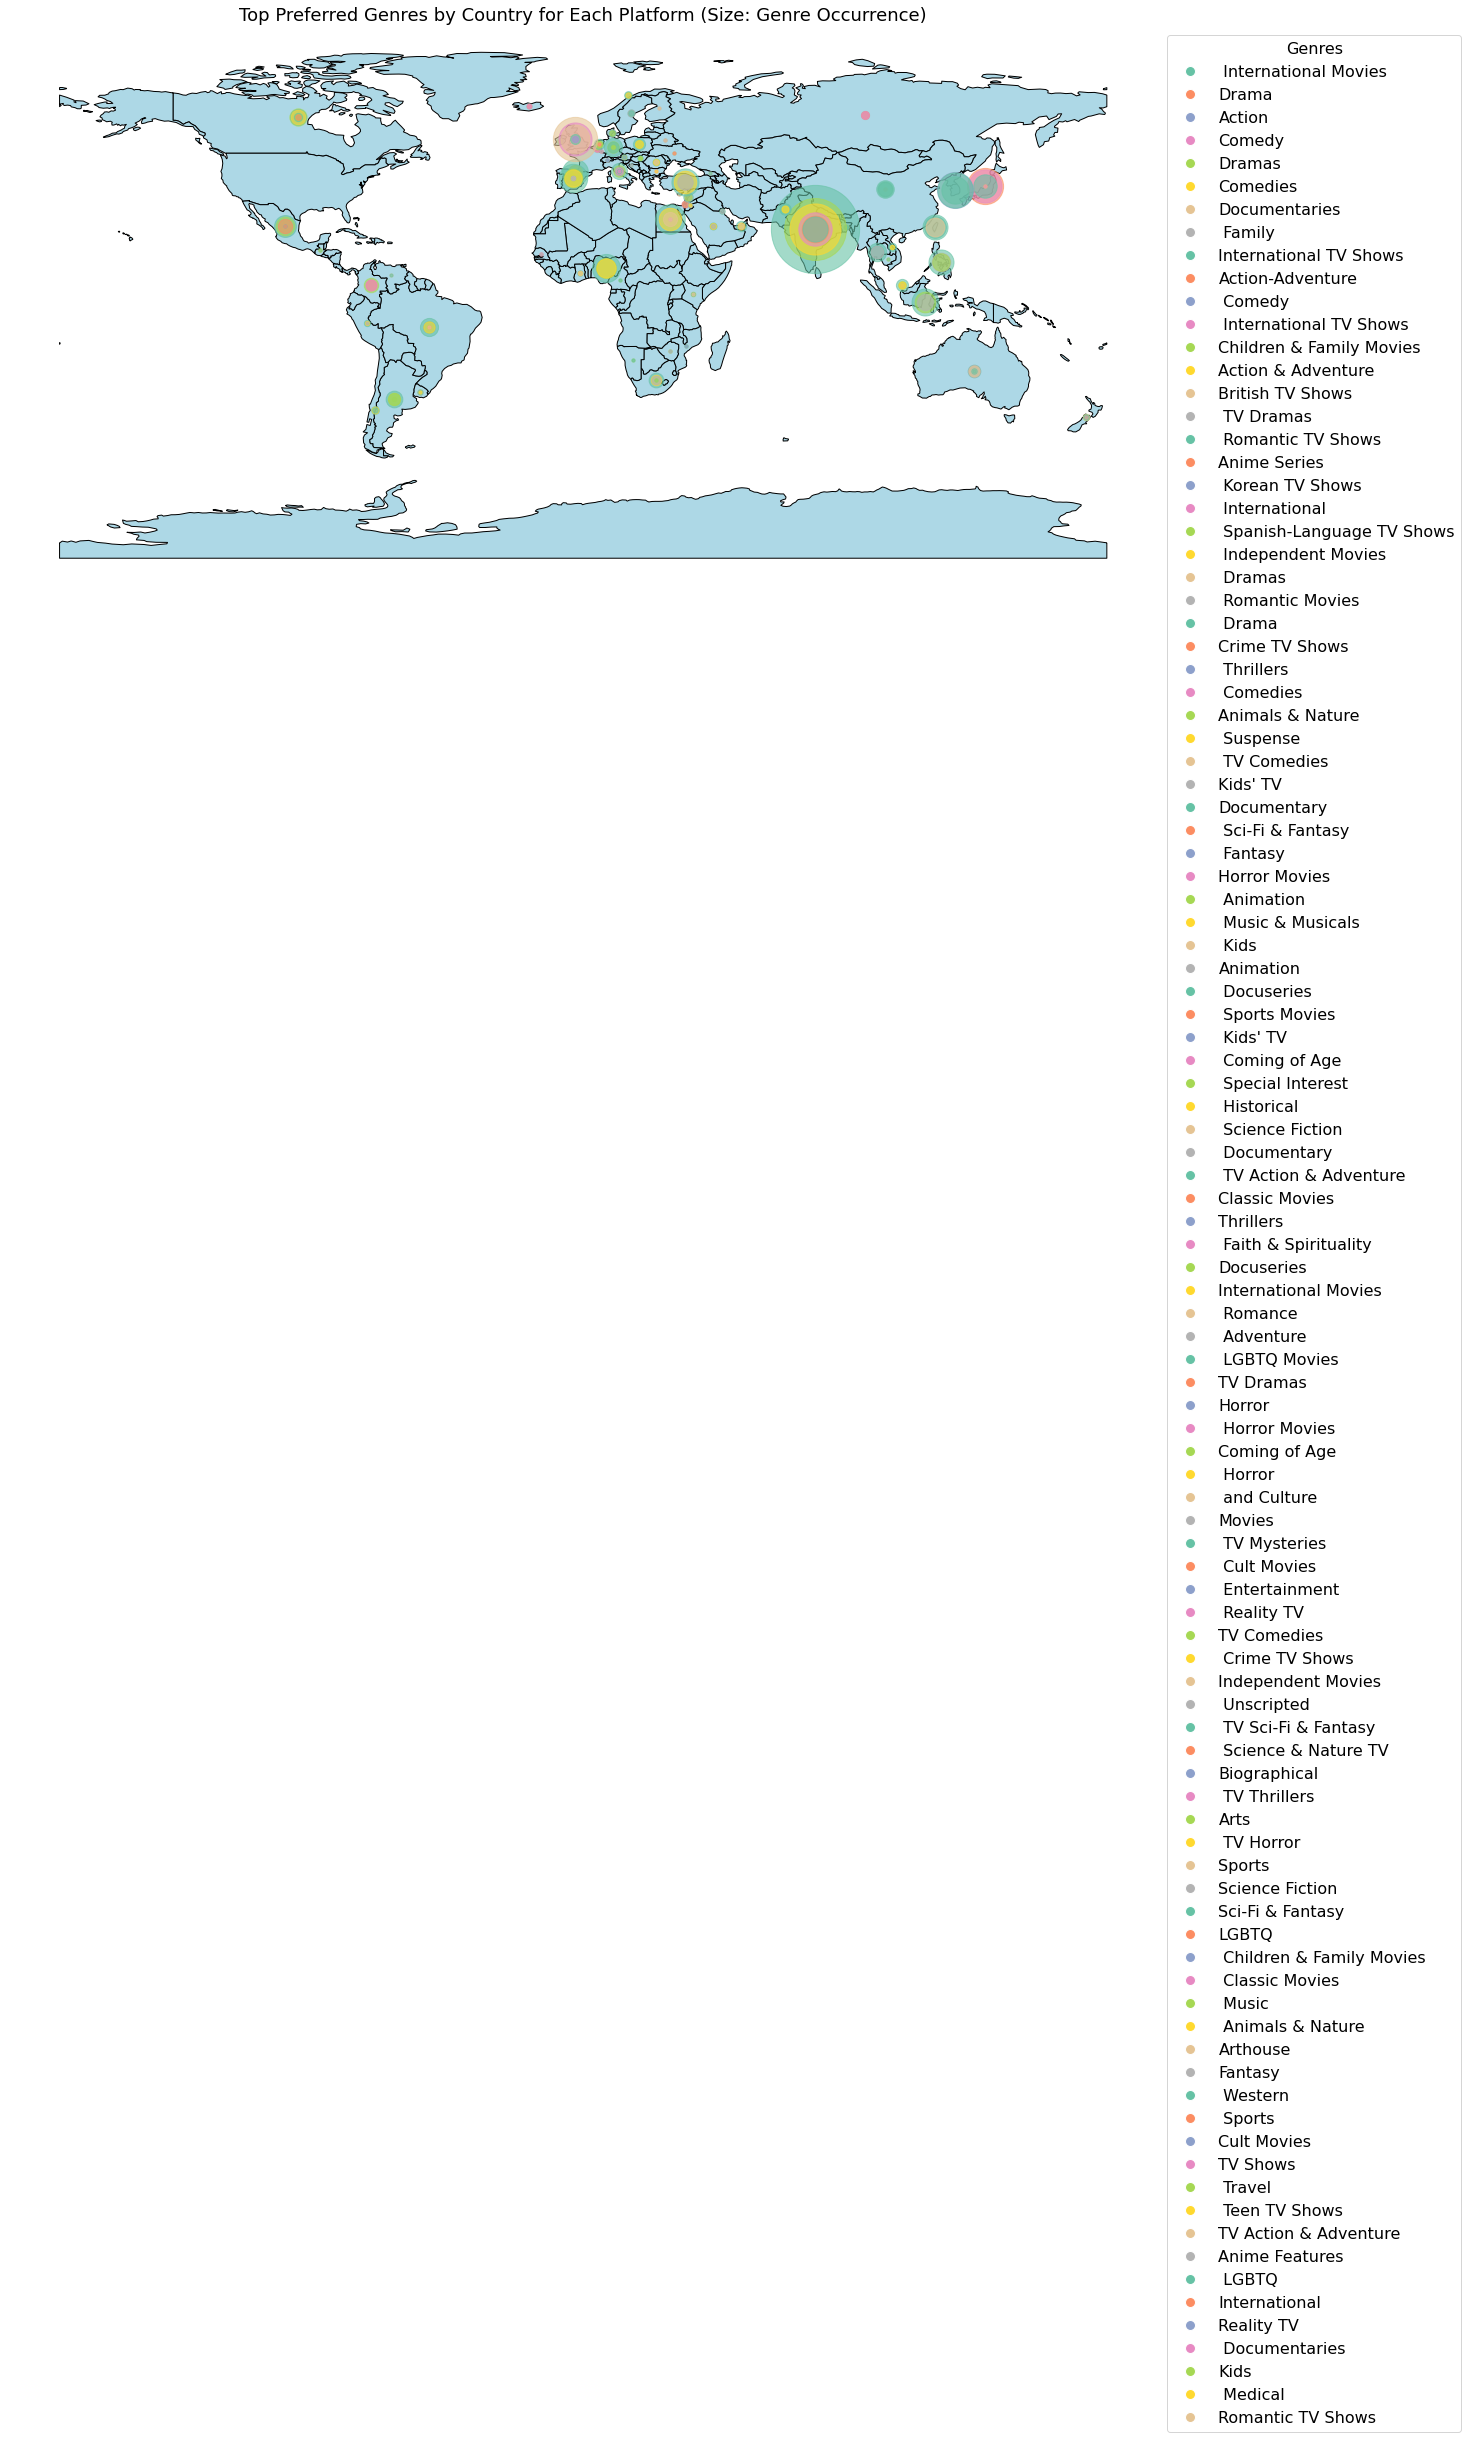

In [199]:
# 장르별 전체 Count 합산하여 상위 장르부터 정렬
genre_total_count = all_genre_df.groupby('Genre')['Count'].sum().sort_values(ascending=False)

# 고유 장르 수에 맞는 색상 생성
genre_colors = sns.color_palette("Set2", n_colors=len(genre_total_count))

# 장르와 색상 매핑 (정렬된 장르에 대해 색상 할당)
genre_to_color = {genre: genre_colors[i] for i, genre in enumerate(genre_total_count.index)}

# 각 국가에 점을 찍기 (Count가 클수록 점 크기 커짐)
fig, ax = plt.subplots(figsize=(20, 15))

# 세계 지도 그리기
world.plot(ax=ax, color='lightblue', edgecolor='black')

# 각 국가에 점을 찍기
for _, row in merged.iterrows():
    if pd.notna(row['Count']):  # Count 값이 있을 경우에만 표시
        genre = row['Genre']
        color = genre_to_color.get(genre, 'gray')  # 장르에 맞는 색상 할당
        ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y,
                   s=row['Count'] * 10,  # Count에 비례하여 점의 크기 조정
                   color=color,  # 고유 장르에 맞는 색상 적용
                   alpha=0.6)

# 제목 및 레이블 설정
plt.title('Top Preferred Genres by Country for Each Platform (Size: Genre Occurrence)', fontsize=18)
plt.axis('off')
plt.tight_layout()  # 레이아웃 자동 조정
plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.1)  # 여백 조정 (top 값을 작게 하여 제목과 그래프 간격 조정)

# 범례 추가 (상위 장르부터 표시)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in genre_colors]
labels = genre_total_count.index  # 장르 순서대로 정렬된 라벨 사용

plt.legend(handles, labels, title="Genres", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()